# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Ознакомление с данными

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

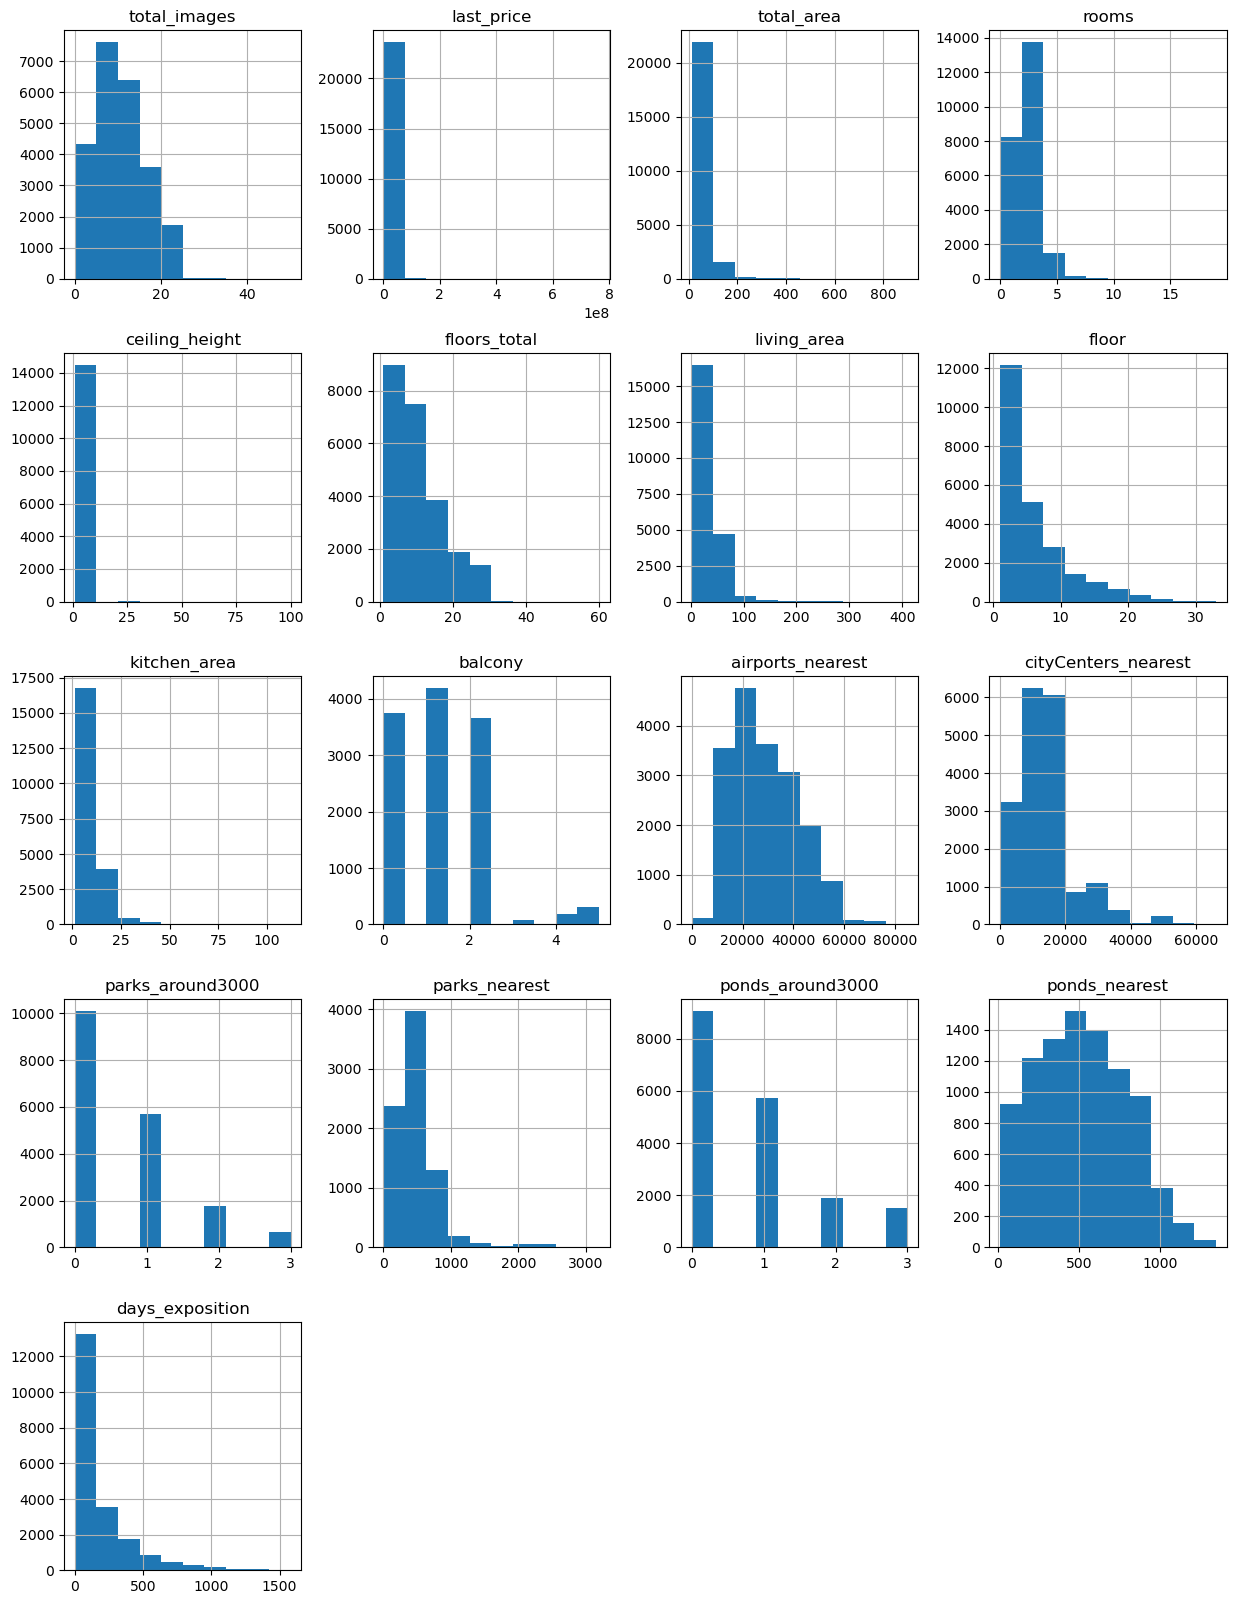

In [5]:
data.hist(figsize=(15, 20))
plt.show()

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Ознакомившись с данными, на первый взгляд можно сказать, что у нас в распоряжении 23 699 объявлений.

Есть пропуски как по столбцам, заполненным пользователем, так и по картографическим данным.

Необходимо изменить формат даты и некоторые другие типы данных, например общее количество этажей не может быть не целым числом или число балконов. 

Выполним необходимые изменения для проведения анализа.

### Предобработка данных

In [8]:
data.isna().sum() #смотрим в каких столбцах пропуски и сколько их

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
data[['balcony', 'parks_around3000', 'ponds_around3000']] = data[['balcony', 'parks_around3000', 'ponds_around3000']].fillna(value=0) 

#заменяем пропуски в данных по количеству балконов, парков и водоемов в радиусе 3 км значением 0, 
# предположив, что если их не указали, значит их нет

In [10]:
data.loc[(data['floors_total'].isna()), 'floors_total'] = data['floor'] 
#выбираем из таблицы строки с пропусками в floors_total 
#и заменяем их значением из столбца floor
data['floors_total'].isna().sum() #проверяем остались ли пропуски в floors_total 

0

In [11]:
ratio_liv_tot_area = data['living_area'].mean()/data['total_area'].mean()
ratio_liv_tot_area #находим отношение среднего значения жилой площади к общей

0.5709796633031908

In [12]:
ratio_kit_tot_area = data['kitchen_area'].mean()/data['total_area'].mean()
ratio_kit_tot_area #находим отношение среднего значения площади кухни к общей

0.17514570787846914

In [13]:
data.loc[(data['living_area'].isna()), 'living_area'] = ratio_liv_tot_area*data['total_area'] 

#выбираем из таблицы строки с пропусками в living_area 
#и заменяем их произведением отношения среднего значения жилой площади к общей на общую площадь
    
data['living_area'].isna().sum() #проверяем остались ли пропуски в living_area

0

In [14]:
data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = ratio_kit_tot_area*data['total_area'] 

#выбираем из таблицы строки с пропусками в kitchen_area 
#и заменяем их произведением отношения среднего значения площади кухни к общей на общую площадь
    
data['kitchen_area'].isna().sum() #проверяем остались ли пропуски в kitchen_area

0

In [15]:
len(data[data['living_area'] + data['kitchen_area'] < 0.95*data['total_area']]) 

#проверяем сколько строк соответствует условию сумма жилой площади и кухни меньше чем 0,95 общей площади

23371

Количество строк, не соответствующих условию не так много, отбросим эти данные.

In [16]:
data = data.query('living_area + kitchen_area < 0.95*total_area')

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(value=False) 

#заполняем пропуски в данных об аппартаментах, предполагая что если значение пропущено то квартира не является аппартаментами

In [18]:
data['ceiling_height'].unique() #смотрим уникальные значения высоты потолков

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76, 25.  ,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,
        2.66,  2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,
        3.15,  3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,
        5.3 ,  5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,
        2.83,  4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,
        3.35,  2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,
        3.52,  3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,
        4.19,  3.24,  4.8 ,  4.5 ,  4.2 ,  3.36, 32.  ,  3.08,  3.68,
        3.07,  3.37,  3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,
        3.14,  4.37,  3.22,  3.27, 27.  ,  4.1 ,  2.68,  2.93,  3.46,
       24.  ,  3.47,

In [19]:
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = data['ceiling_height']/10

#заменим выбивающиеся значения на подходящие, разделив на 10 все потолки больше 5 метров

In [20]:
ceiling_height_median = data['ceiling_height'].median()
ceiling_height_median 

#определим медианное значение высоты потолков

2.65

In [21]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=ceiling_height_median) 

#запоним пропуски в столбце с высотой потолков медианным значением

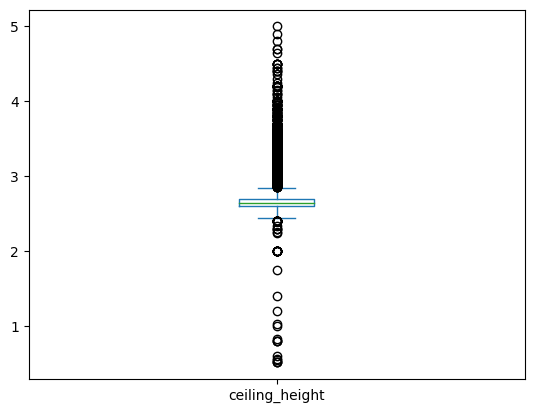

In [22]:
data['ceiling_height'].plot(kind='box')
plt.show() 

#построим диаграмму размаха для столбца со значениями высоты потолков и выявим выбросы

In [23]:
data = data.query('ceiling_height > 2') #отбросим строки, где высота потолков меньше 2 метров

В старом фонде Санкт-Петербурга есть здания с высотой потолков 5 метров, поэтому значения до 5 оставляем. 

Высоту потолков менее 2 метров будем считать ошибкой при запонении данных и отбросим строки с этими значениями, тем более их не так много и они не повлияют на исследование.

In [24]:
data[['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']] = data[['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']].astype(int) 

#меняем тип столбцов:
#стоимость квартиры, количество этажей, балконов, парков, водоемов на целочисленный 

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

#меняем столбец с датой размещения объявления на формат даты без указания времени

In [26]:
data['locality_name'].unique() #смотрим уникальные значения названий местности

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [27]:
data['locality_name'].nunique() #количество уникальных значений

363

In [28]:
data['locality_name'] = data['locality_name'].fillna('') #заменяем пропуски пробелом, чтобы потом удалить дубликаты

In [29]:
def clean(name):
    splited_name = name.split(' ')
    words_for_remove = {'село', 'поселок', 'посёлок', 'городского', 'городской', 'типа', 'коттеджный'} 
    good_words = [word for word in splited_name if word.lower() not in words_for_remove]
    print(good_words)
    return ' '.join(good_words)

data['locality_name'] = data['locality_name'].apply(clean)

#удаляем из названий слова 'село', 'поселок', 'посёлок', 'городского', 'городской', 'типа', 'коттеджный' 
#чтобы устранить дубликаты

['Санкт-Петербург']
['Шушары']
['Санкт-Петербург']
['Санкт-Петербург']
['Санкт-Петербург']
['Янино-1']
['Парголово']
['Санкт-Петербург']
['Мурино']
['Санкт-Петербург']
['Санкт-Петербург']
['Ломоносов']
['Сертолово']
['Петергоф']
['Пушкин']
['Санкт-Петербург']
['Санкт-Петербург']
['Санкт-Петербург']
['Санкт-Петербург']
['Санкт-Петербург']
['Парголово']
['Санкт-Петербург']
['деревня', 'Кудрово']
['Санкт-Петербург']
['Санкт-Петербург']
['Санкт-Петербург']
['Санкт-Петербург']
['Санкт-Петербург']
['Пушкин']
['Санкт-Петербург']
['Коммунар']
['Санкт-Петербург']
['Санкт-Петербург']
['Колпино']
['Санкт-Петербург']
['Санкт-Петербург']
['Санкт-Петербург']
['Красный', 'Бор']
['Мурино']
['Санкт-Петербург']
['Парголово']
['Петергоф']
['Санкт-Петербург']
['Санкт-Петербург']
['Санкт-Петербург']
['Санкт-Петербург']
['Гатчина']
['Санкт-Петербург']
['Санкт-Петербург']
['Пушкин']
['Санкт-Петербург']
['Санкт-Петербург']
['Парголово']
['Санкт-Петербург']
['Санкт-Петербург']
['Санкт-Петербург']
['Шушары']
['

In [30]:
data['locality_name'].nunique() 

#посмотрим сколько теперь уникальных значений в столбце название местности

317

На этапе предобработки данных мы заполнили пропуски, там где это возможно, используя медианные значения или 0. 

Обработали дубликаты в столбце с названием местности. 

Поменяли типы данных в столбцах, где значения должны быть целочисленными, и формат в столбце с датой.

Устранили аномалии в столбцах с площадью, ограничив их условием: сумма жилой площади и площади кухни меньше 0,95 общей площади и отбросили данные, не удовлетворяющие условию и также отбросили строки, в которых высота потолков менее 2м и более 5м. 

Остались не заполненными данные о расстоянии до аэропорта, центра города, парка и водоема их оставим как есть.

<div class="alert alert-info">
<b></b>
<br>Изучим аномалии в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Выбросы отбросим.
</div>

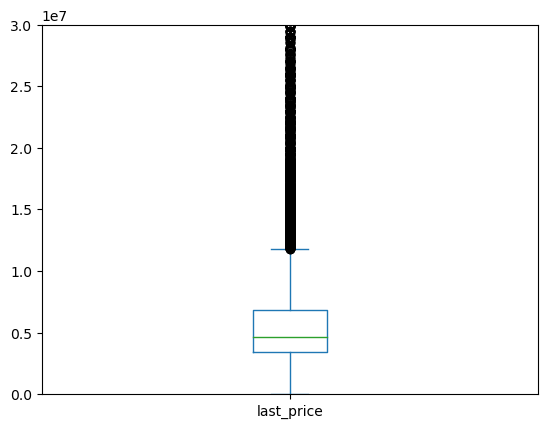

In [31]:
#построим диаграмму размаха для столбца со значениями цен на квартиры и выявим выбросы

data['last_price'].plot(kind='box')
plt.ylim(0, 30000000) 
plt.show() 

In [32]:
#посмотрим сколько строк в датасете со стоимостью квартир более 13 млн. рублей (значения выше верхнего уса)

len(data[data['last_price'] > 13000000]) 

1595

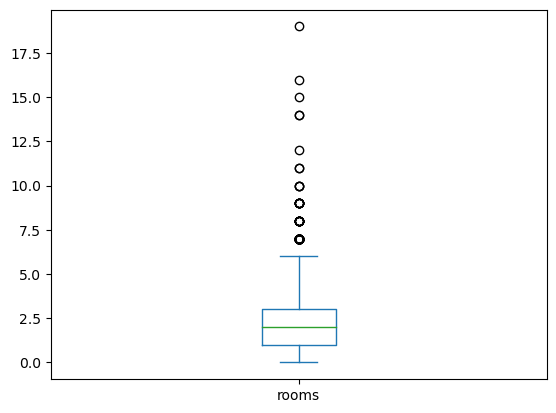

In [33]:
#построим диаграмму размаха для столбца со значениями количества комнат и выявим выбросы

data['rooms'].plot(kind='box')
plt.show() 

In [34]:
#посмотрим сколько строк в датасете с количеством комнат более 7 (значения выше верхнего уса)

len(data[data['rooms'] > 7]) 

30

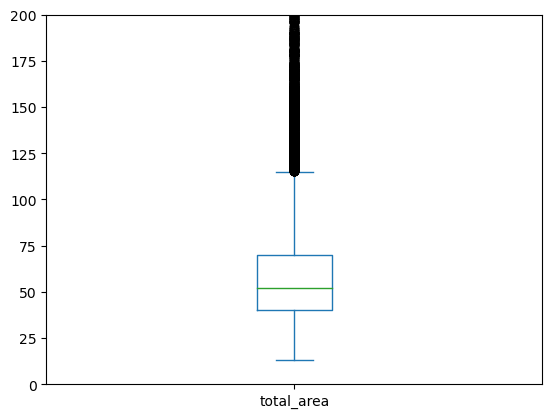

In [35]:
#построим диаграмму размаха для столбца со значениями общей площади и выявим выбросы

data['total_area'].plot(kind='box')
plt.ylim(0, 200) 
plt.show() 

In [36]:
#посмотрим сколько строк в датасете с общей площадью более 125 кв.м. (значения выше верхнего уса)

len(data[data['total_area'] > 125]) 

918

In [37]:
data_new = data.query('last_price < 13000000 and rooms < 7 and total_area < 125')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21570 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21570 non-null  int64         
 1   last_price            21570 non-null  int32         
 2   total_area            21570 non-null  float64       
 3   first_day_exposition  21570 non-null  datetime64[ns]
 4   rooms                 21570 non-null  int64         
 5   ceiling_height        21570 non-null  float64       
 6   floors_total          21570 non-null  int32         
 7   living_area           21570 non-null  float64       
 8   floor                 21570 non-null  int64         
 9   is_apartment          21570 non-null  bool          
 10  studio                21570 non-null  bool          
 11  open_plan             21570 non-null  bool          
 12  kitchen_area          21570 non-null  float64       
 13  balcony         

In [38]:
data_new.shape[0] / data.shape[0]

0.924006168608636

Количество отброшенных данных менее 10%, значит все в порядке

In [39]:
data = data_new

### Посчитаем и добавим в таблицу новые столбцы

In [40]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype(int)

#цену за квадратный метр считаем как стоимость разделить на общую площадь
#приводим столбец в целочисленный тип

In [41]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday 
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

#добавляем столбцы с днем недели, месяцем и годом публикации

In [42]:
def floor_type(data):  
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    return 'другой' 
data['floor_type'] = data.apply(floor_type, axis=1)

#добавляем столбец тип этажа с помощью функции возвращающей значения:
#— «первый», «последний», «другой», при выполнении соответствующих условий

In [43]:
data['city_сenters_nearest_km'] = data['cityCenters_nearest'].fillna(value=-1) 

#ставим заглушку в столбце расстояние до центра города, чтобы потом перевести значения из метров в км

In [44]:
data['city_сenters_nearest_km'] = data['city_сenters_nearest_km'] / 1000

#переводим значения из метров в км

data['city_сenters_nearest_km'].unique()

#смотрим какие теперь уникальные значениия

array([18.603, 13.933,  8.098, ..., 27.977,  7.262,  6.263])

In [45]:
data['city_сenters_nearest_km'] = data['city_сenters_nearest_km'].round()
data.head()

#округляем значения до целого числа

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_сenters_nearest_km
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065,0,9,2018,другой,-0.0
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.4,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195,3,11,2017,другой,19.0


Необходимые расчеты произведены, новые столбцы добавлены в датафрейм.

### Проведем исследовательский анализ данных

In [46]:
%config InlineBackend.figure_format = 'retina'

#улучшаем качество графиков

In [47]:
import matplotlib
matplotlib.style.use('seaborn-pastel')

#выбираем стиль

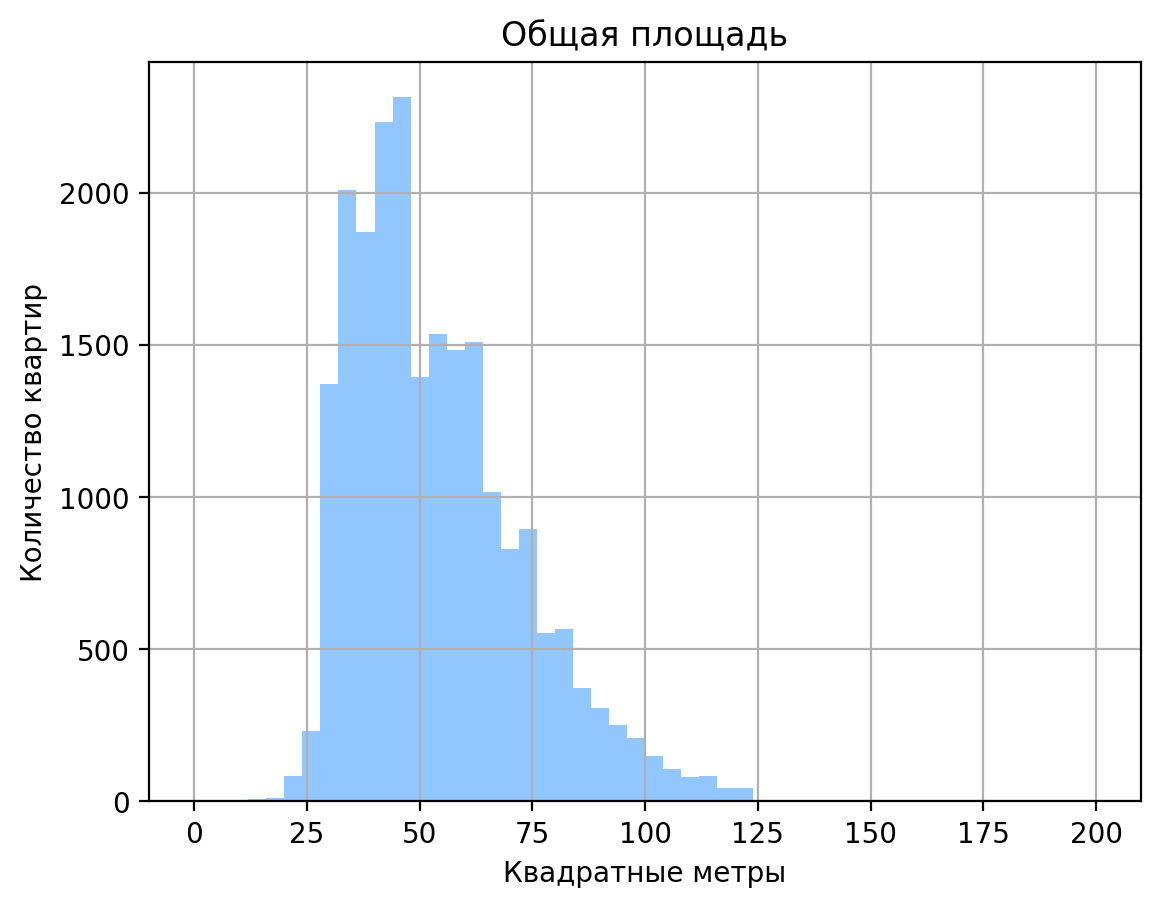

In [48]:
data['total_area'].hist(bins=50, range=(0, 200))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Наибольшее число предложений в объявлениях это квартиры общей площадью до 50 кв.м.

Количество вариантов до 100 кв. м. также представлены в достаточном объеме.

Предложения более 100 кв.м. уже в единичных вариантах.

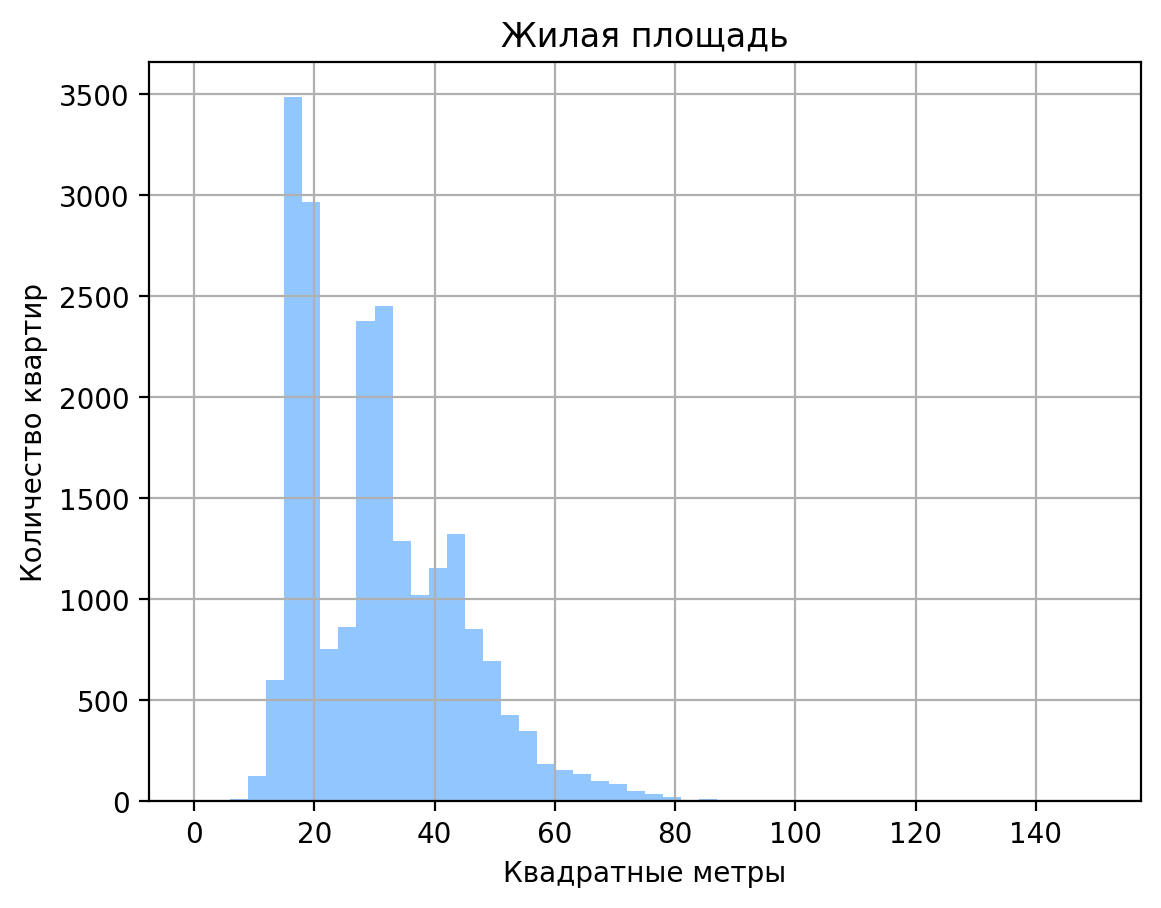

In [49]:
data['living_area'].hist(bins=50, range=(0, 150))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Количество предложений с жилой площадью около 20 кв. м. метров больше всего, также довольно много с жилой площадью 30 кв. м.

После 70 кв. м. предложения единичны.

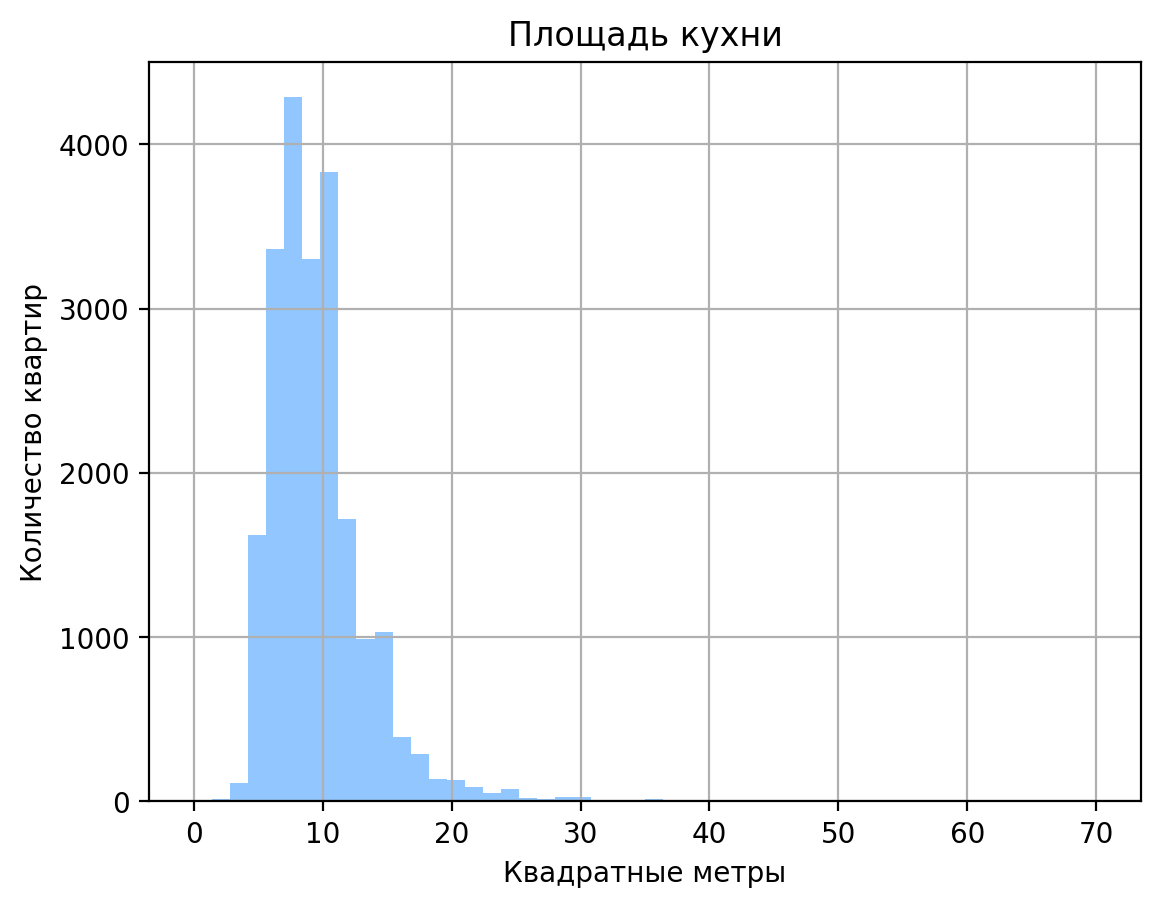

In [50]:
data['kitchen_area'].hist(bins=50, range=(0, 70))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [51]:
data['kitchen_area'].describe()

count    21570.000000
mean         9.547924
std          3.857010
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

Самое большое количество предложений с кухнями до 10 кв. м. 
После 20 кв. м. есть редкие варианты. Необходимо учитывать что есть такие типы квартир как аппартаменты, или же в квартире имеется кухня-гостинная и кухня не выделяется отдельно.

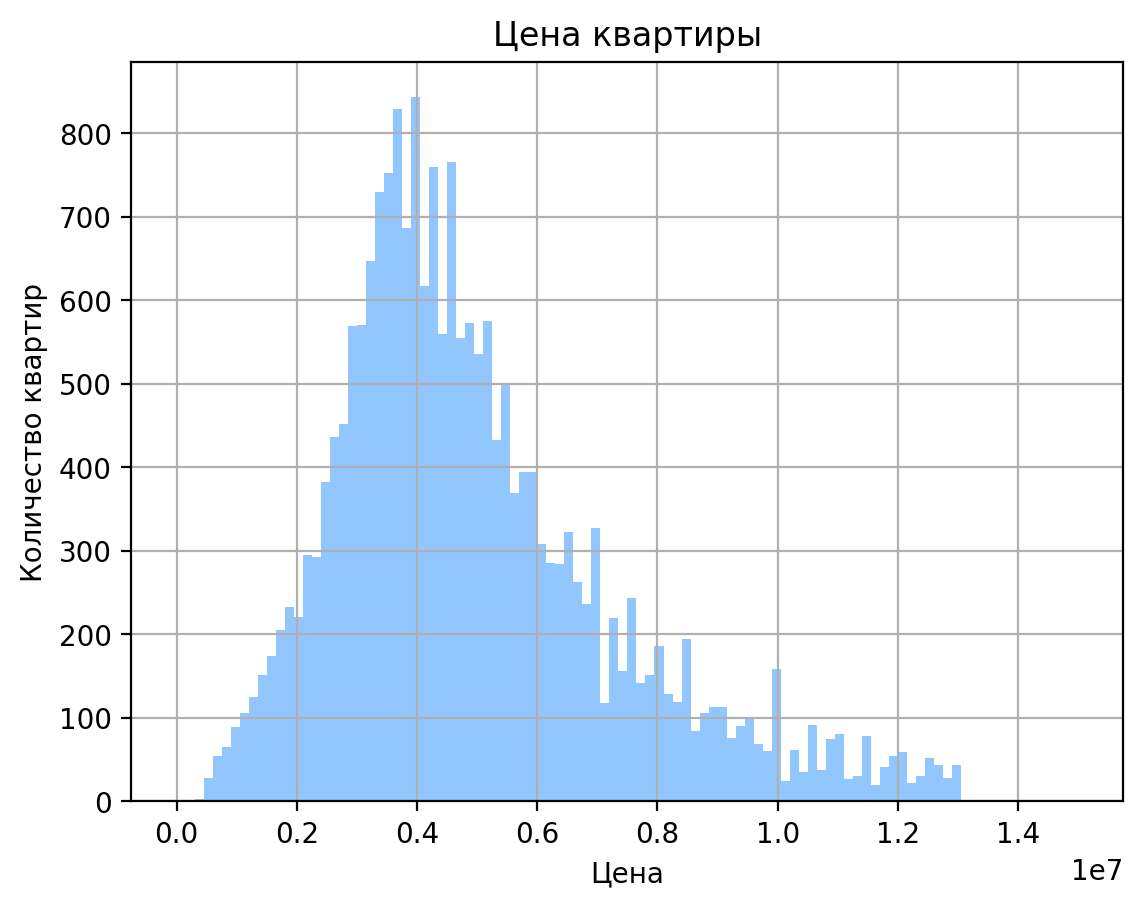

In [52]:
data['last_price'].hist(bins=100, range=(0, 15000000))
plt.title('Цена квартиры')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

По гисторграмме стоимости квартир мы видим нормальное распределение. Большинство предложений находятся в районе 4 млн. руб.

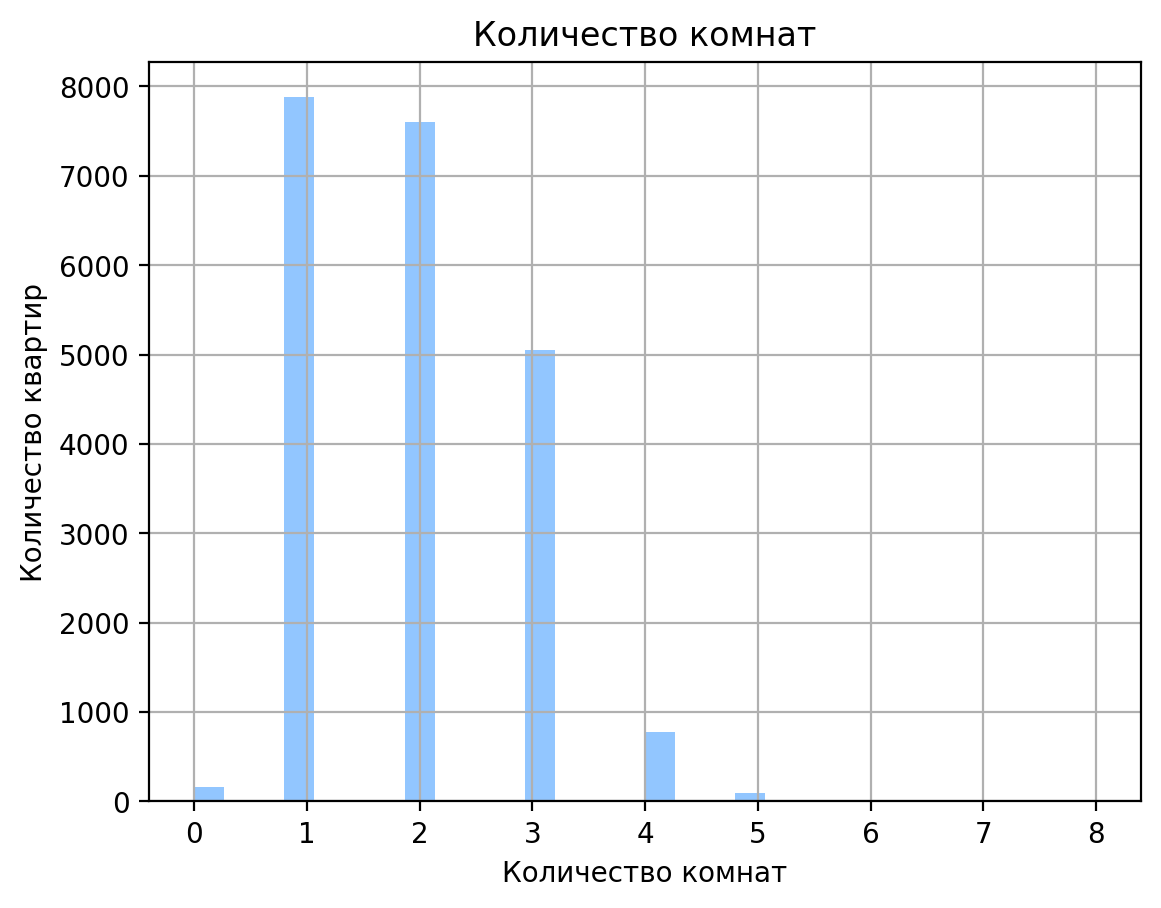

In [53]:
data['rooms'].hist(bins=30, range=(0, 8))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Большинство объявлений это 1, 2х  и 3х комнатные квартиры. 

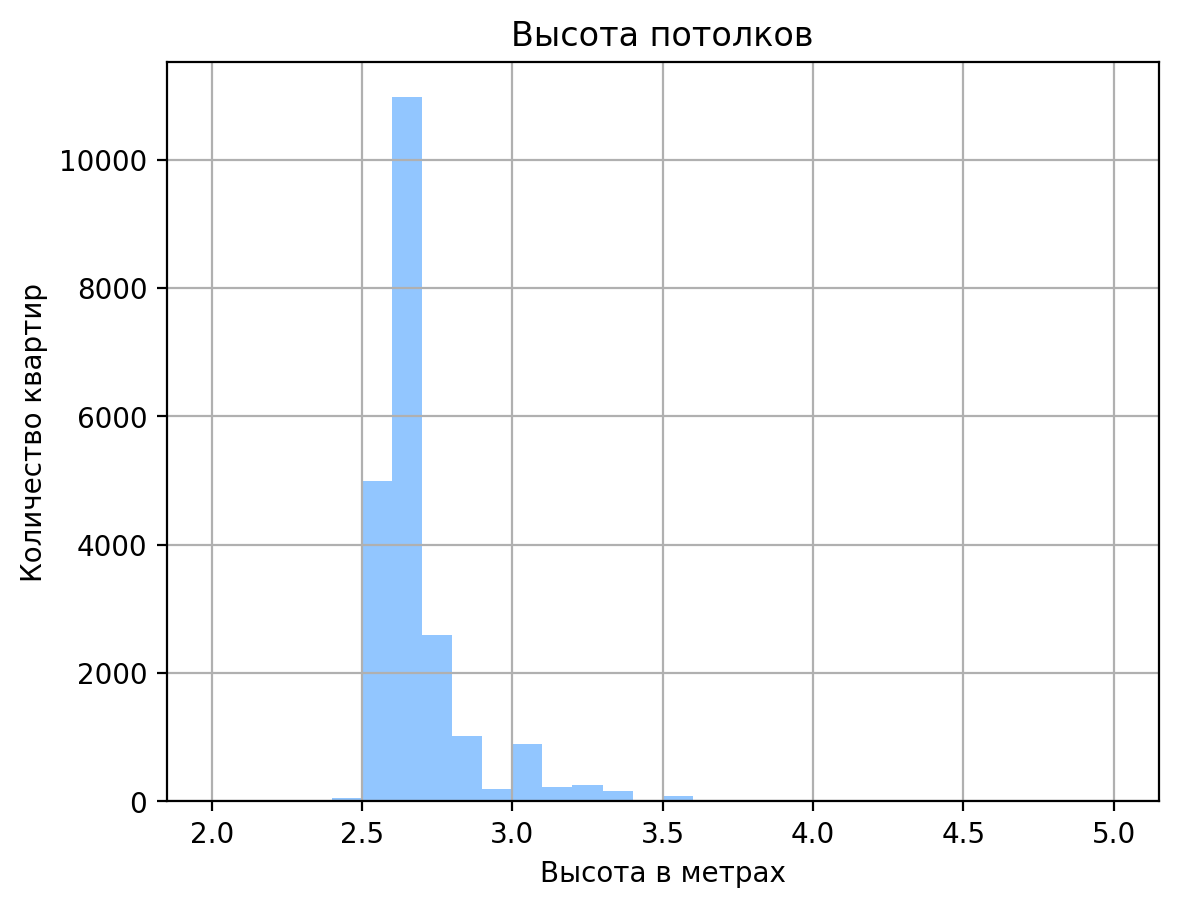

In [54]:
data['ceiling_height'].hist(bins=30, range=(2, 5))
plt.title('Высота потолков')
plt.xlabel('Высота в метрах')
plt.ylabel('Количество квартир')
plt.show()

Преобладают стандартные варианты высоты потолков 2,7 м.

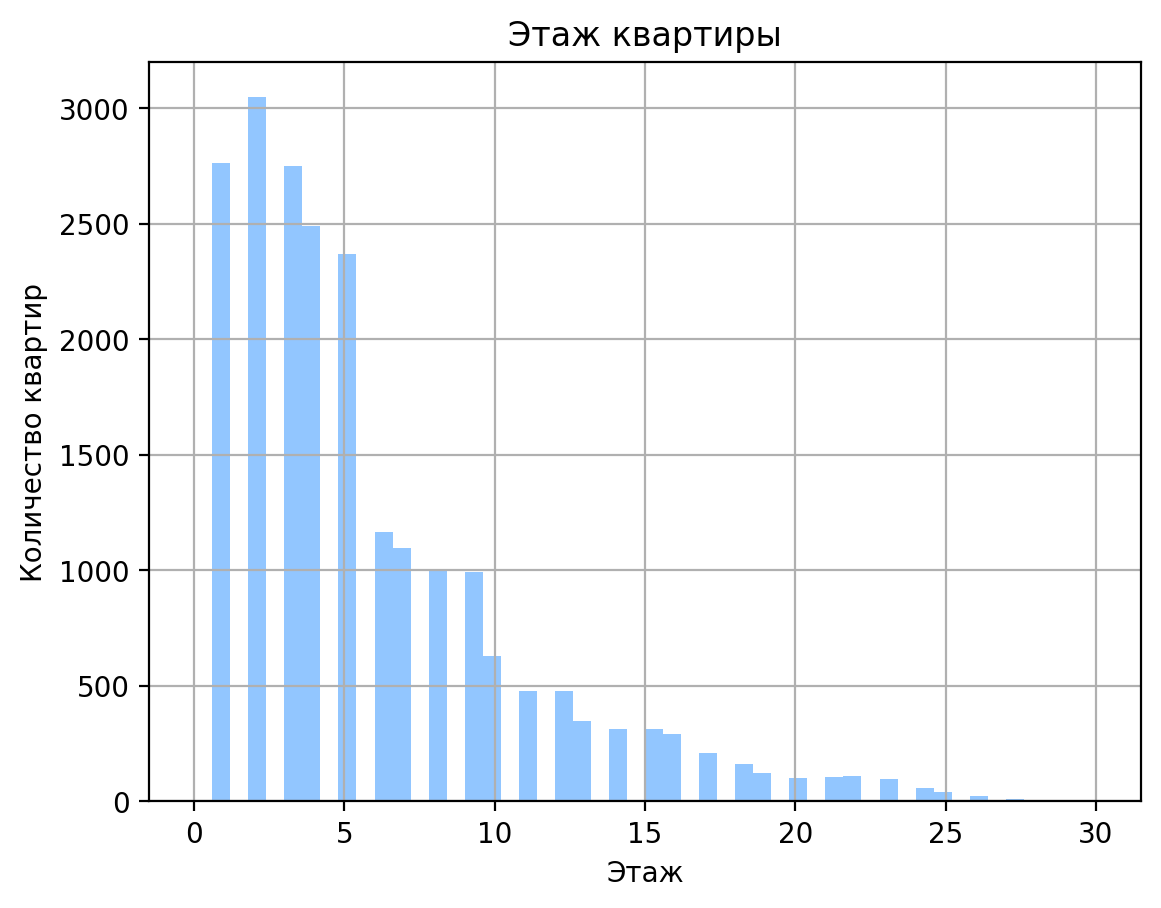

In [55]:
data['floor'].hist(bins=50, range=(0, 30))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Большое количество объявлений в диапазоне зданий до 5 этажей. Возможно это связано с объявлениями не в Санкт-Петербурге, а его окрестностях, где преобладает малоэтажная застройка.

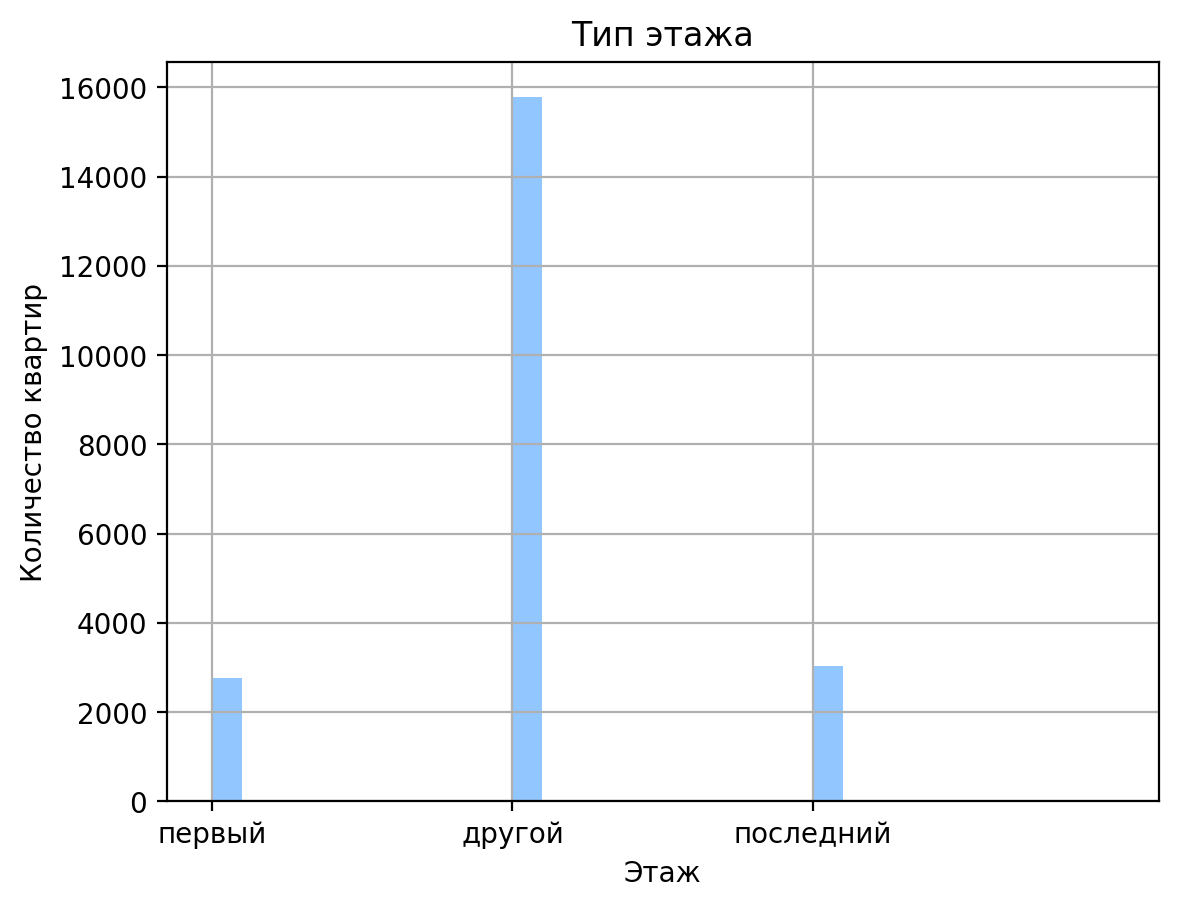

In [56]:
data['floor_type'].hist(bins=30, range=(0, 3))
plt.title('Тип этажа')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Не удивительно, большинство квартир с типом этажа другой.

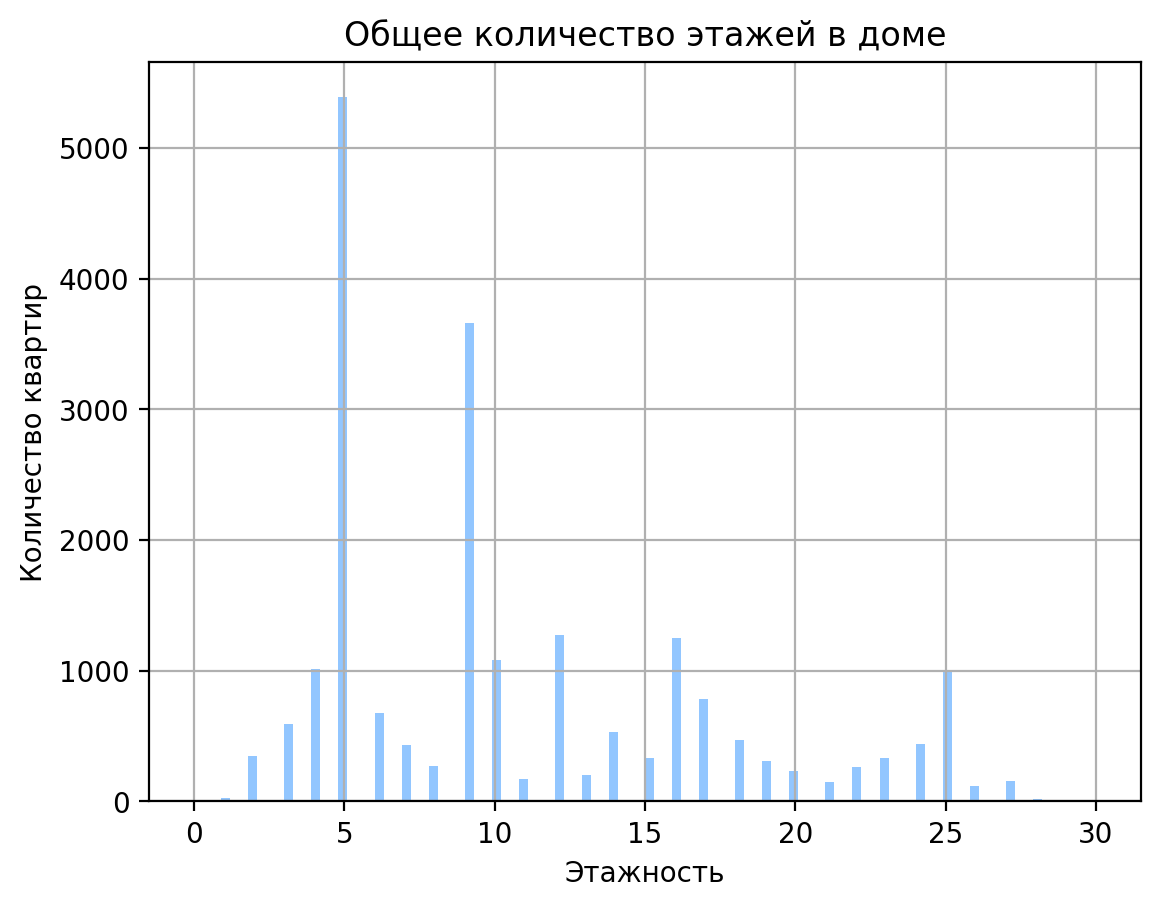

In [57]:
data['floors_total'].hist(bins=100, range=(0, 30))
plt.title('Общее количество этажей в доме')
plt.xlabel('Этажность')
plt.ylabel('Количество квартир')
plt.show()

Довольно много предложений в 5этажках, также выделяются 9этажные здания, и чуть превышают количество других вариантов 12 и 16 этажные.

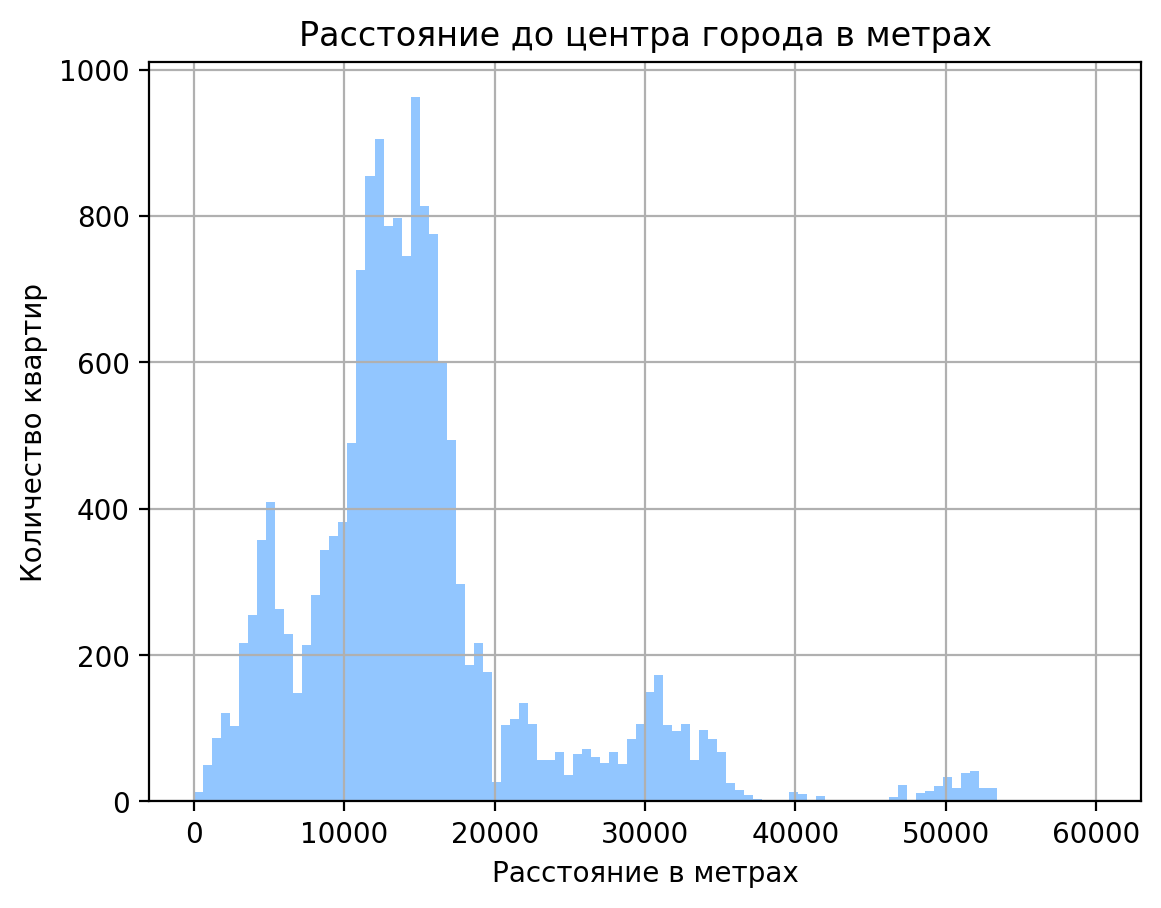

In [58]:
data['cityCenters_nearest'].hist(bins=100, range=(0, 60000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show() 

Самое большое количество объявлений на квартиры от 10 до 20 км от центра города.

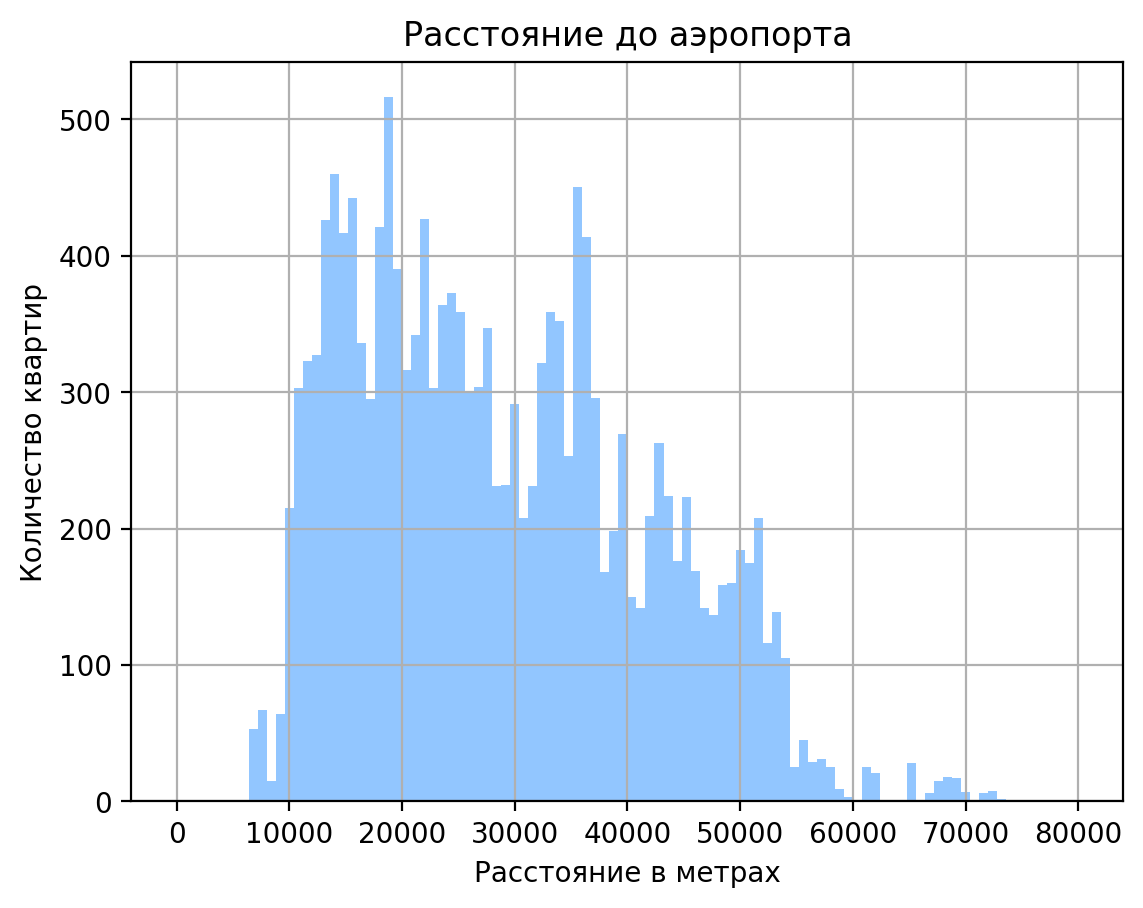

In [59]:
data['airports_nearest'].hist(bins=100, range=(0, 80000))
plt.title('Расстояние до аэропорта')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show() 

Основная масса представленных вариантов квартир находится на расстояянии от 10 до 40 км от аэропорта.

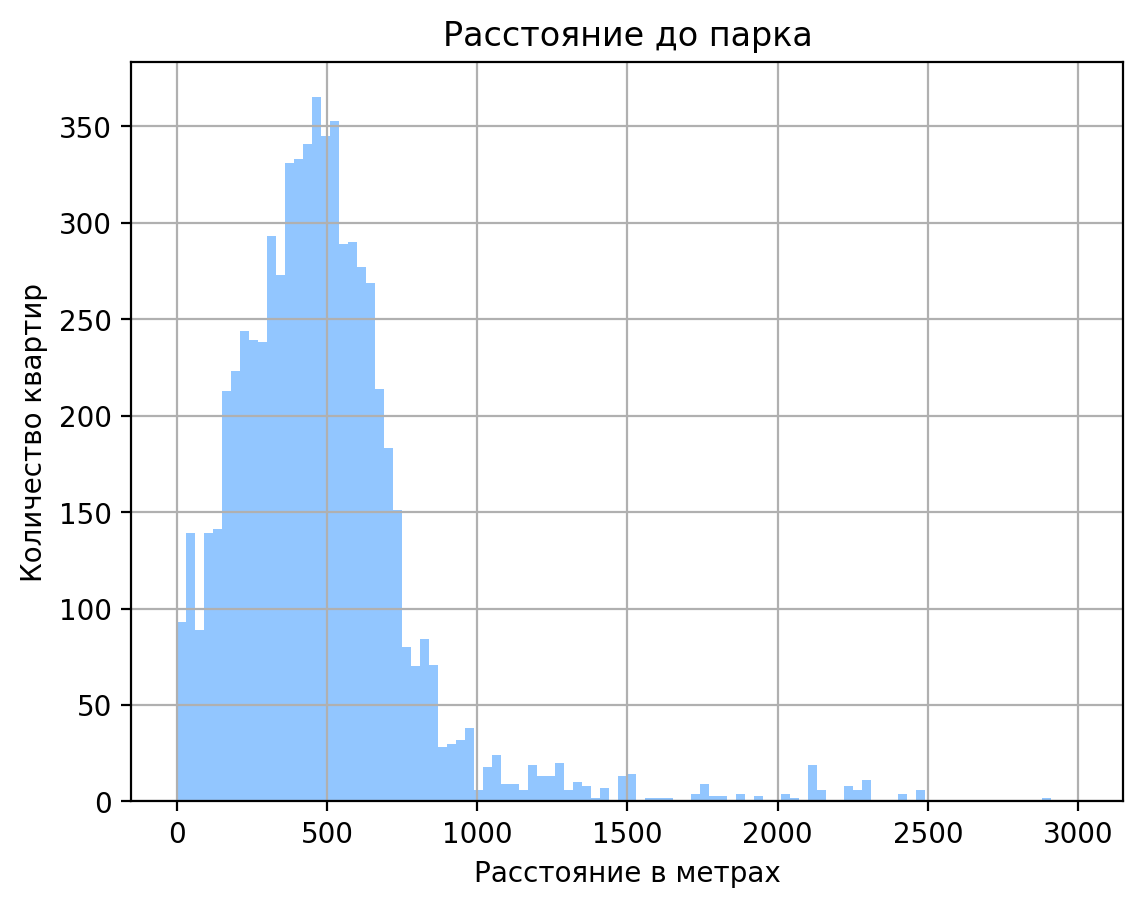

In [60]:
data['parks_nearest'].hist(bins=100, range=(0, 3000))
plt.title('Расстояние до парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show() 

По гисторгамме может показаться, что в подавляющем числе вариантов, рядом с квартирой в пределах 1 км есть парк, но это не так. Как мы помним количество пропусков в этом столбце было более половины всех объявлений. 

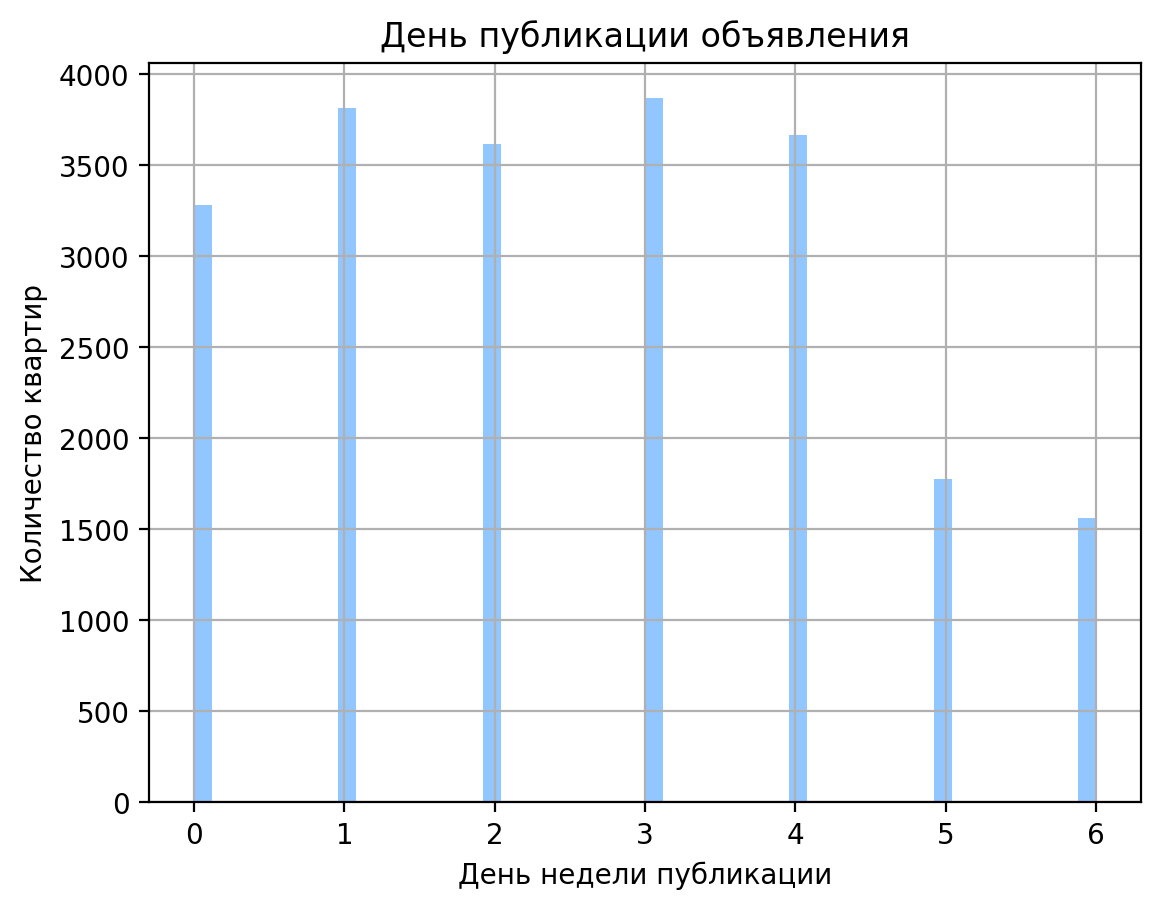

In [61]:
data['weekday_exposition'].hist(bins=50, range=(0, 6))
plt.title('День публикации объявления')
plt.xlabel('День недели публикации')
plt.ylabel('Количество квартир')
plt.show() 

Здесь можно сказать нет существенных  различий по количеству публикаций в зависимости от дня недели. В целом в выходные дни публикаций меньше, чем в будни, что  соответсвует графику работы большинства агенств недвижимости.

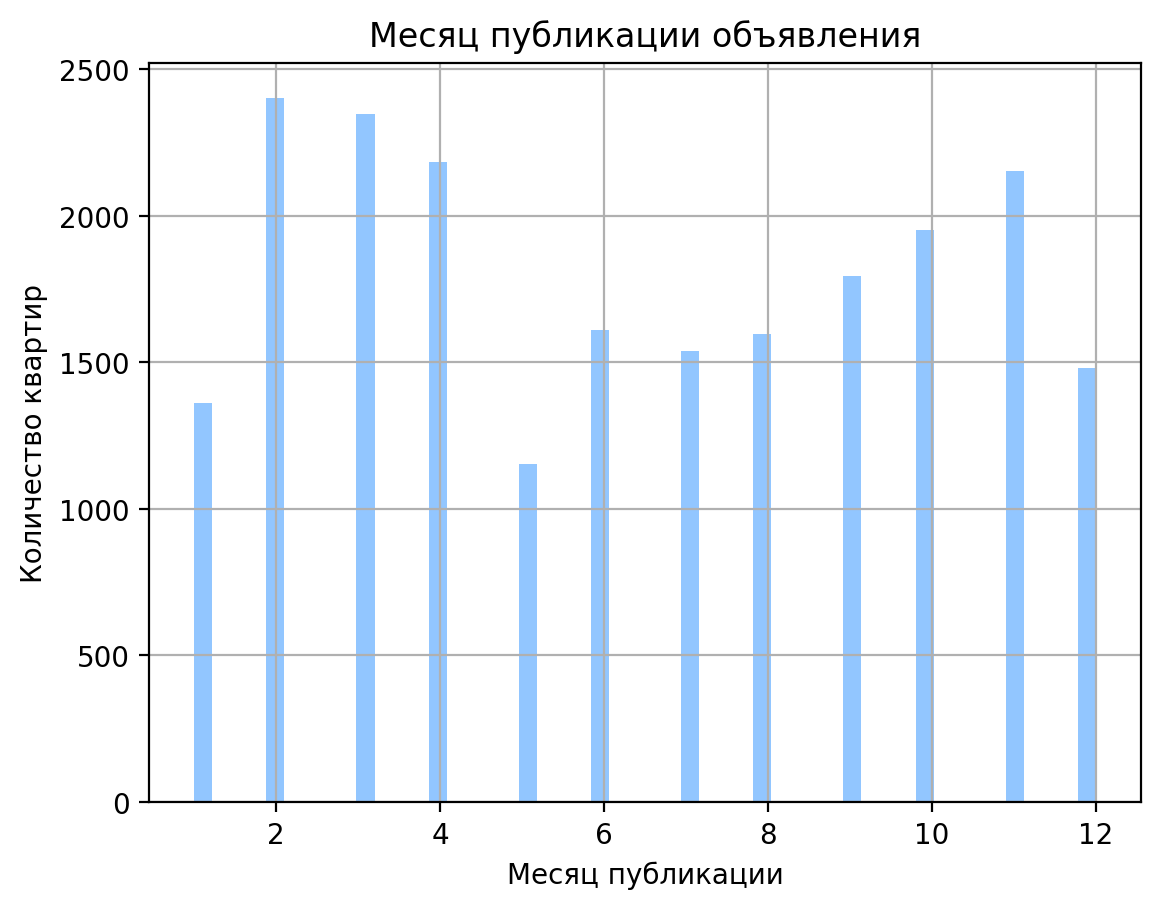

In [62]:
data['month_exposition'].hist(bins=50, range=(1, 12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество квартир')
plt.show() 

По количеству публикаций в течение года можно отметить следующую тенденцию: наибольший рост в феврале, далее к лету идет снижение активности, осенью внонь рост, но чуть менее интенсивный, чем в начале года и к концу года спад.

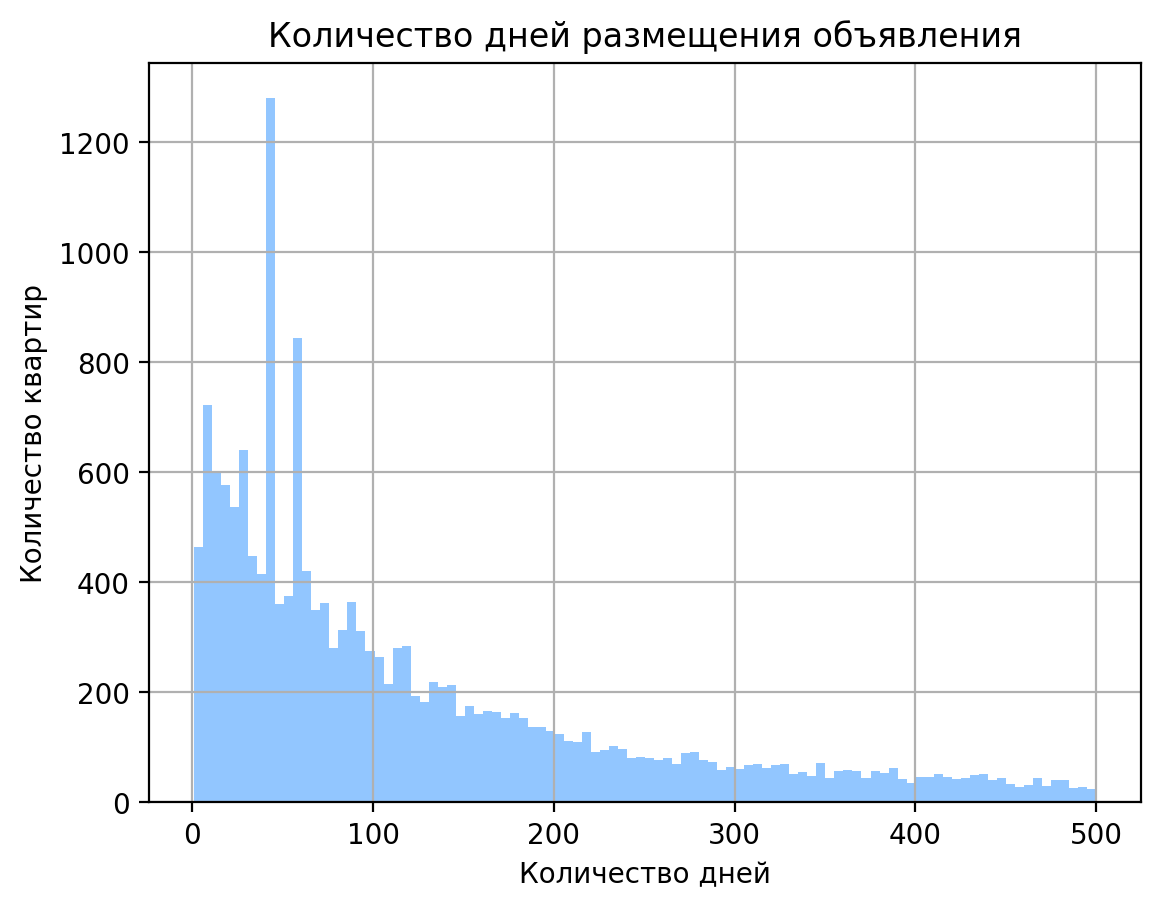

In [63]:
data['days_exposition'].hist(bins=100, range=(1, 500))
plt.title('Количество дней размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show() 

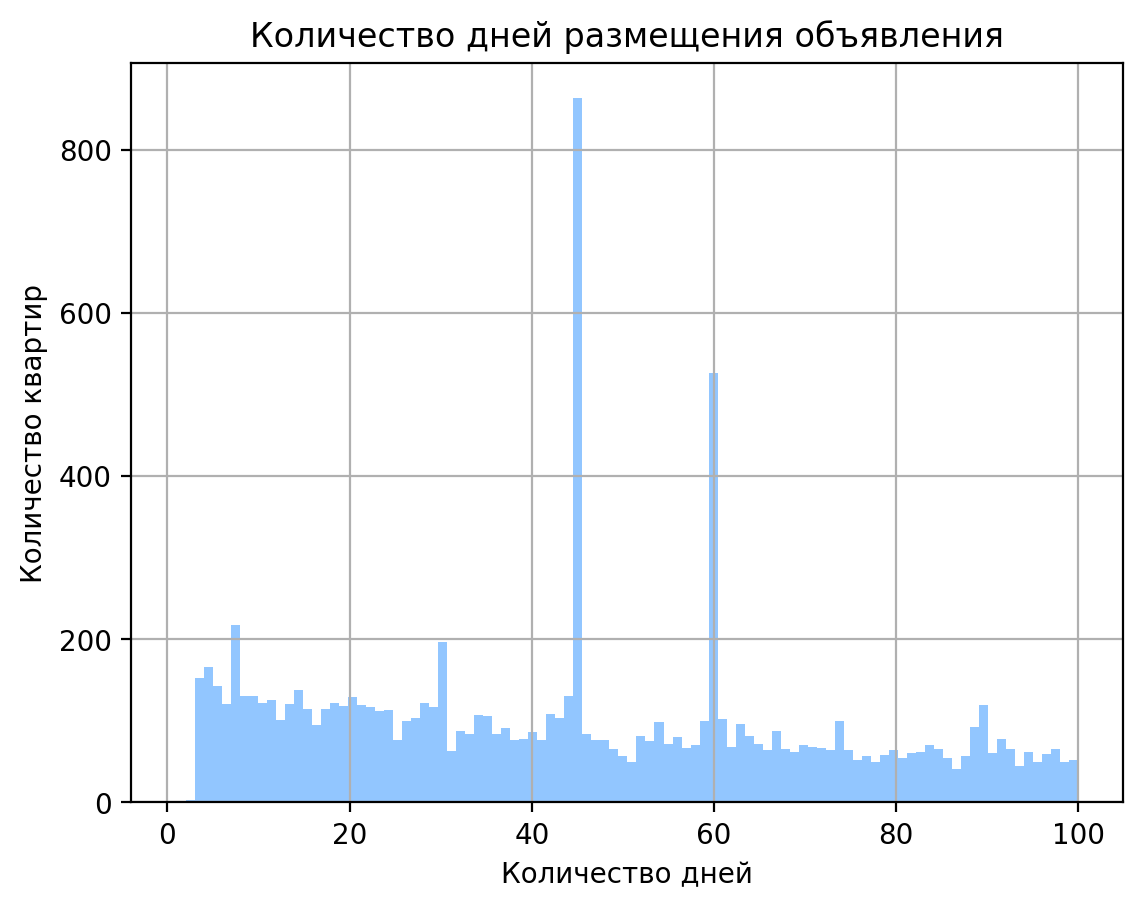

In [64]:
data['days_exposition'].hist(bins=100, range=(1, 100))
plt.title('Количество дней размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

In [65]:
data['days_exposition'].mean()

174.1857784826857

In [66]:
data['days_exposition'].median()

92.0

In [67]:
data['days_exposition'].describe()

count    18915.000000
mean       174.185778
std        212.351415
min          1.000000
25%         44.000000
50%         92.000000
75%        221.000000
max       1580.000000
Name: days_exposition, dtype: float64

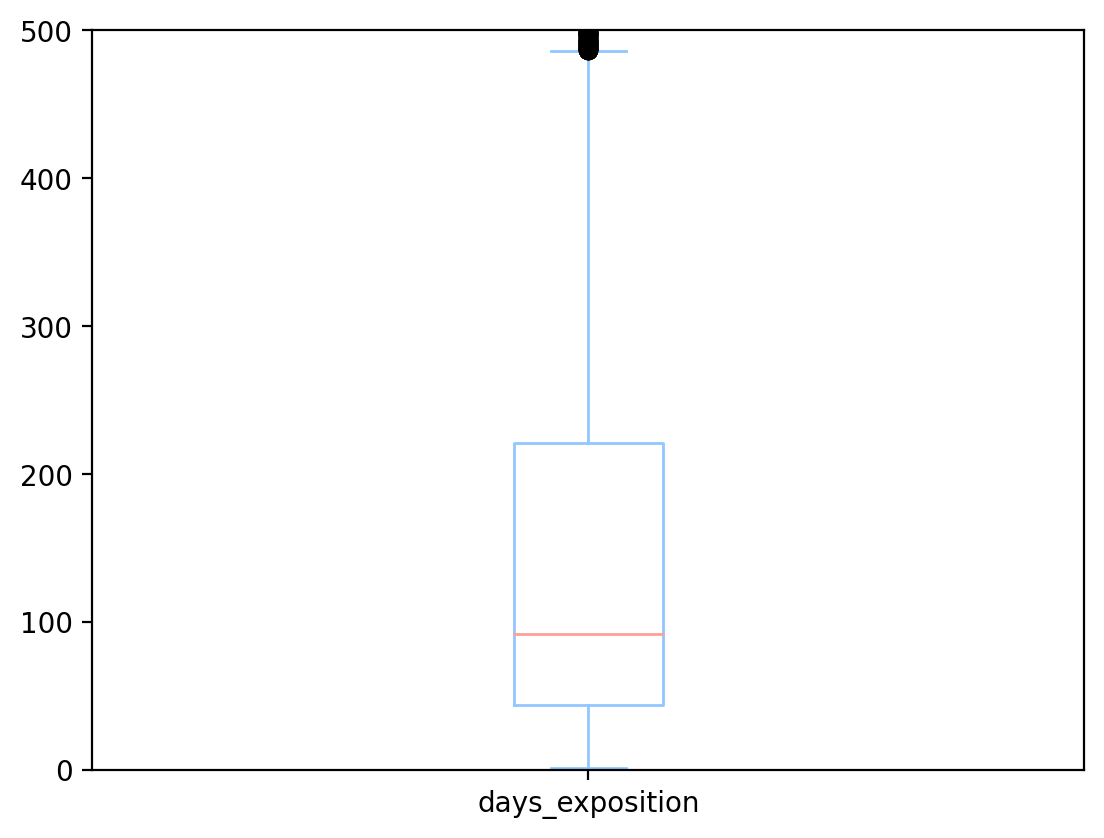

In [68]:
data['days_exposition'].plot(kind='box')
plt.ylim(0, 500) 
plt.show() 

**Вывод**

По первой гистограмме с диапозоном до 500 дней видно, что большиство продаж происходит менее чем за 100 дней, однако имеются значительные выбросы.

По второй гистограмме с диапазоном до 100 дней видно, что эти выбросы приходяться на 45 и 60 дней, возможно это говорит не о продаже квартиры, а просто объявление сняли с продажи, потому как закончился срок его размещения. 

Среднее значение сотавляет 174 дня, медиана равна 92 дня.

Таким образом, обычно продажа квартиры занимает около 3х месяцев, продажи менее 45 дней можно считать быстрыми, а продажи более 500 дней — необычно долгими.

0.7172304508540557


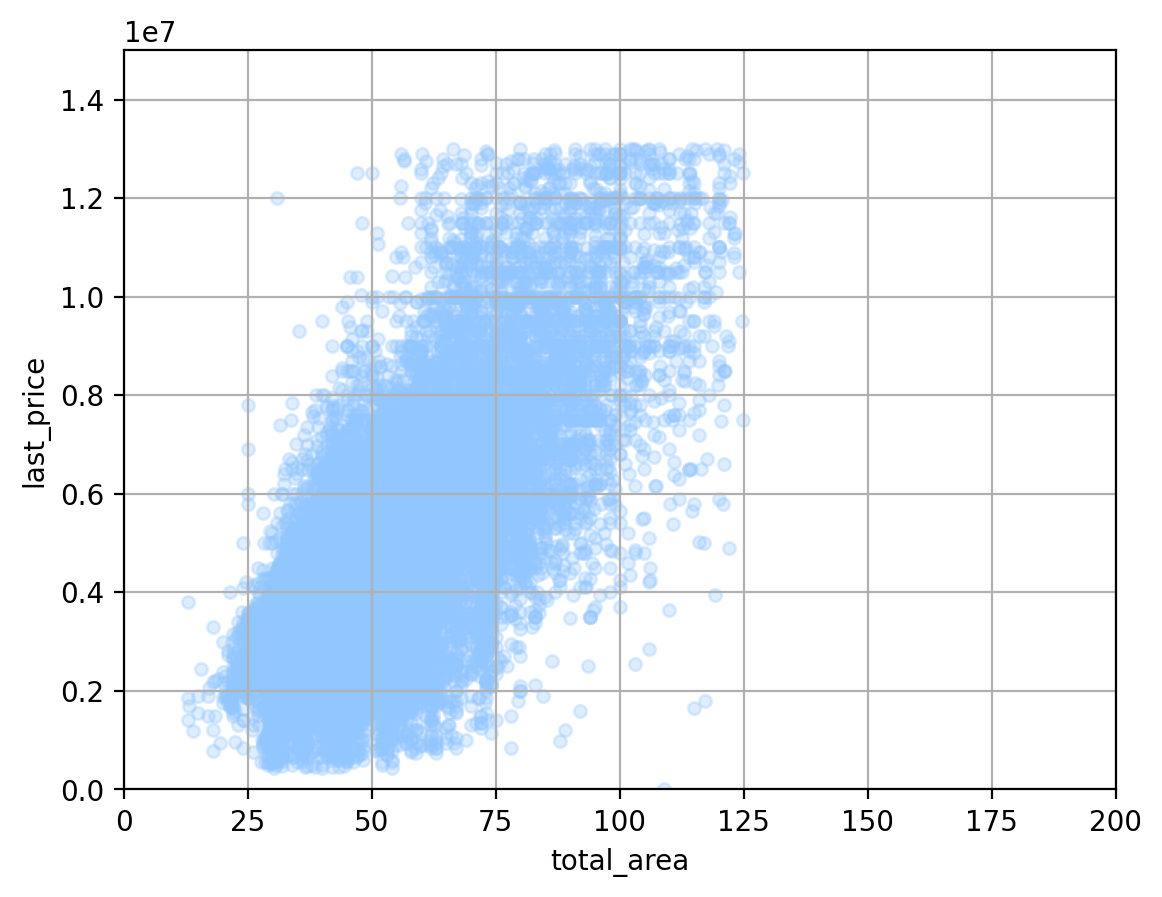

In [69]:
print(data['total_area'].corr(data['last_price']))

#посчитаем кореляцию общей плащади и стоимости квартиры

data.plot(x='total_area', y='last_price', kind='scatter', grid = True, alpha = 0.3) 
plt.xlim(0, 200)
plt.ylim(0, 15000000)
plt.show() 

#построим диаграмму рассеивания ограничив значения до 500 кв.м по оси x и до 50 млн. руб. по оси y, 
#чтобы посмотреть зависимость в основной массе объявлений

Вывод: стоимость квартиры зависит от общей площади, но взаимосязь не слишком велика - 0,71 по коэффициенту Пирсона, значит на цену влияют и другие факторы.

0.5959871986240943


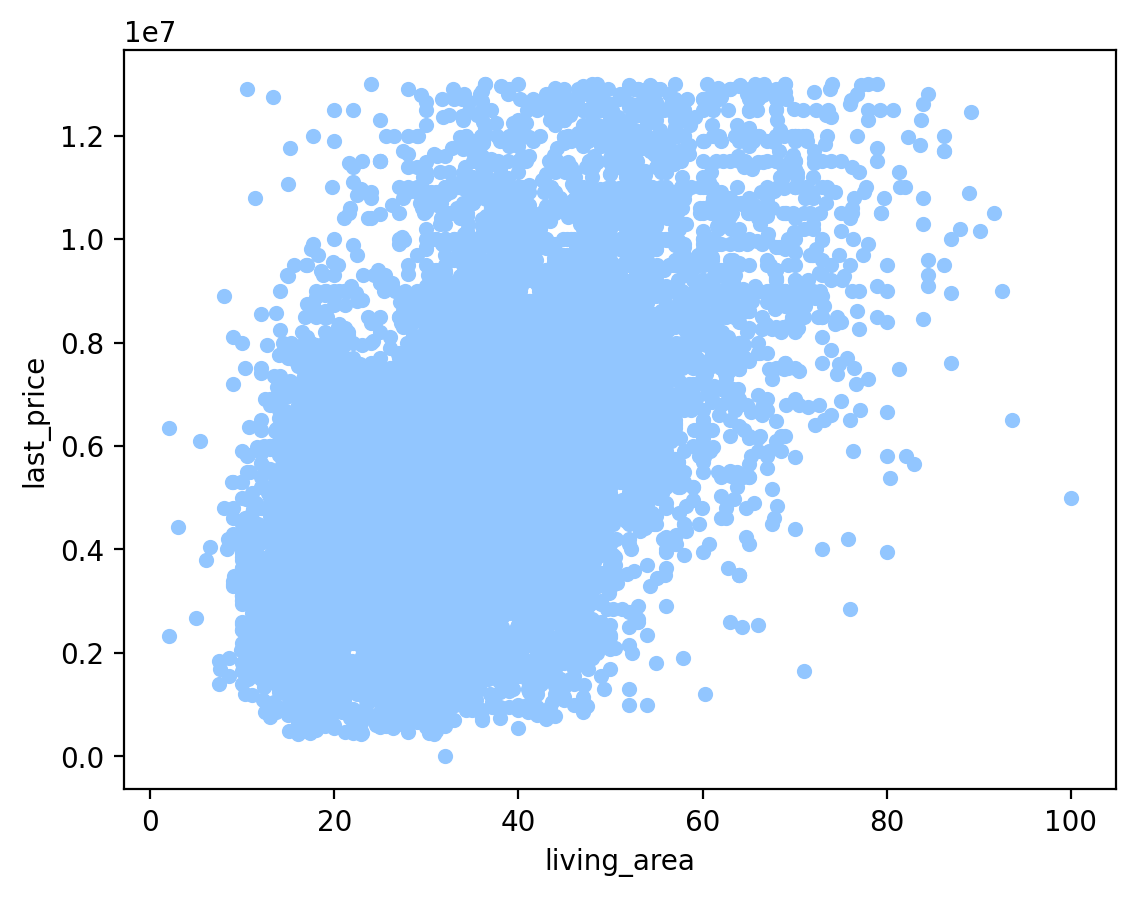

In [70]:
print(data['living_area'].corr(data['last_price']))

data.plot(x='living_area', y='last_price', kind='scatter') 
plt.show() 

0.5224339843248346


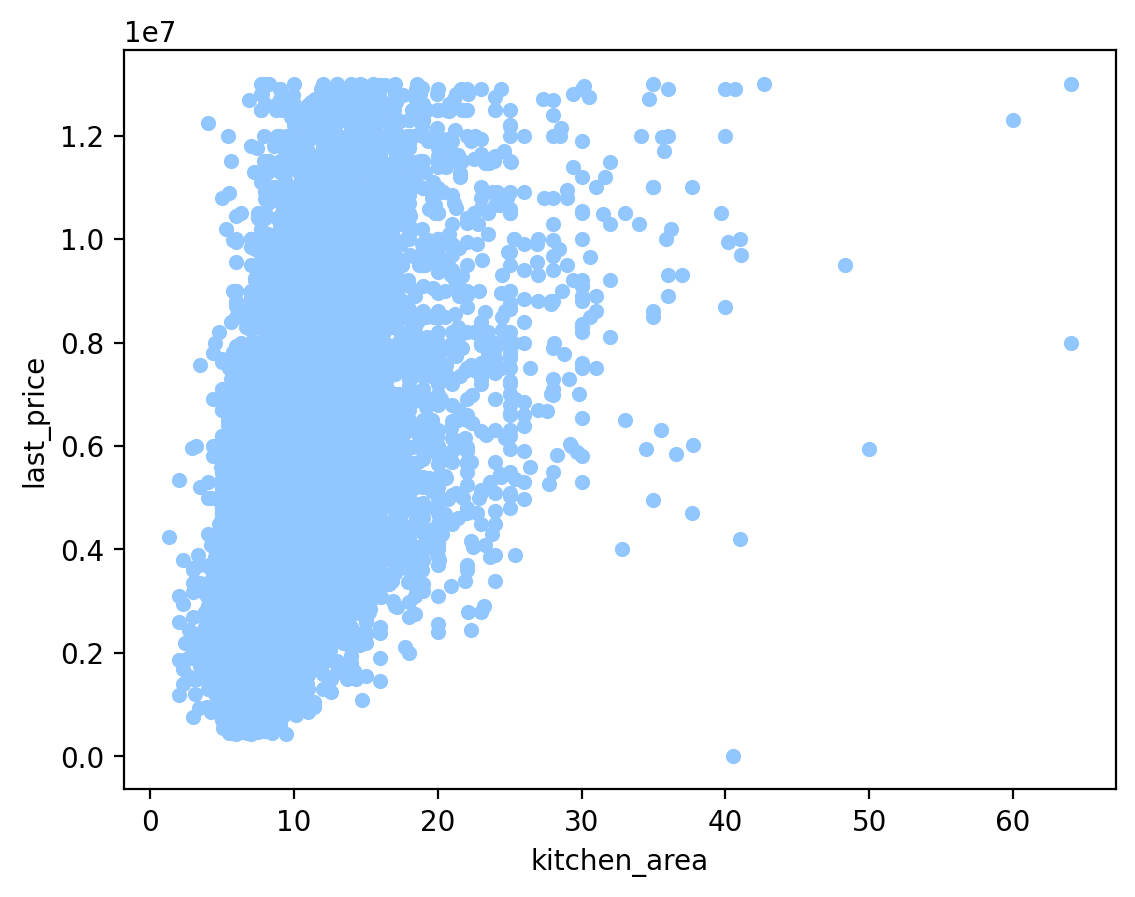

In [71]:
print(data['kitchen_area'].corr(data['last_price']))
data.plot(x='kitchen_area', y='last_price', kind='scatter') 
plt.show() 

Зависимость между ценой квартиры и жилой площадью или площадью кухни не так сильна, коэффициенты корреляции составляют 0,59 и 0,52 соответственно. В целом можно сказать что, цена квартиры увеличивается при увеличении жилой площади или площади кухни.

0.44812436721741006


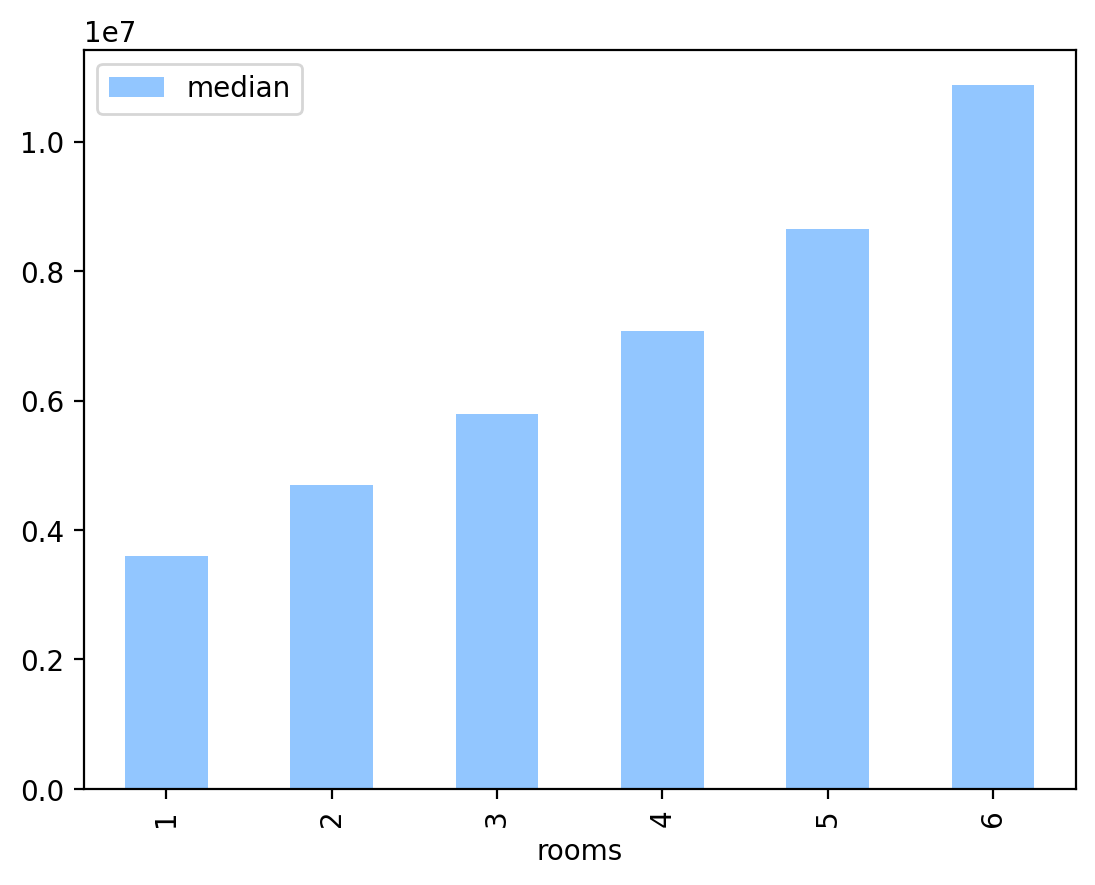

In [72]:
data = data.query('rooms != 0')
print(data['rooms'].corr(data['last_price']))
data_pivot_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['median'])
data_pivot_rooms.columns = ['median']

data_pivot_rooms.plot(kind='bar')
plt.show() 

Коэффициент Пирсона 0,44, достаточно маленький. 
Планировка квартир очень разная и могут быть однокомнатные квартиры с большой площадью, и многокомнатные квартиры с меньшей площадью. 
Но по графику видно что с увеличением количества комнат увеличивается и стоимость квартиры.

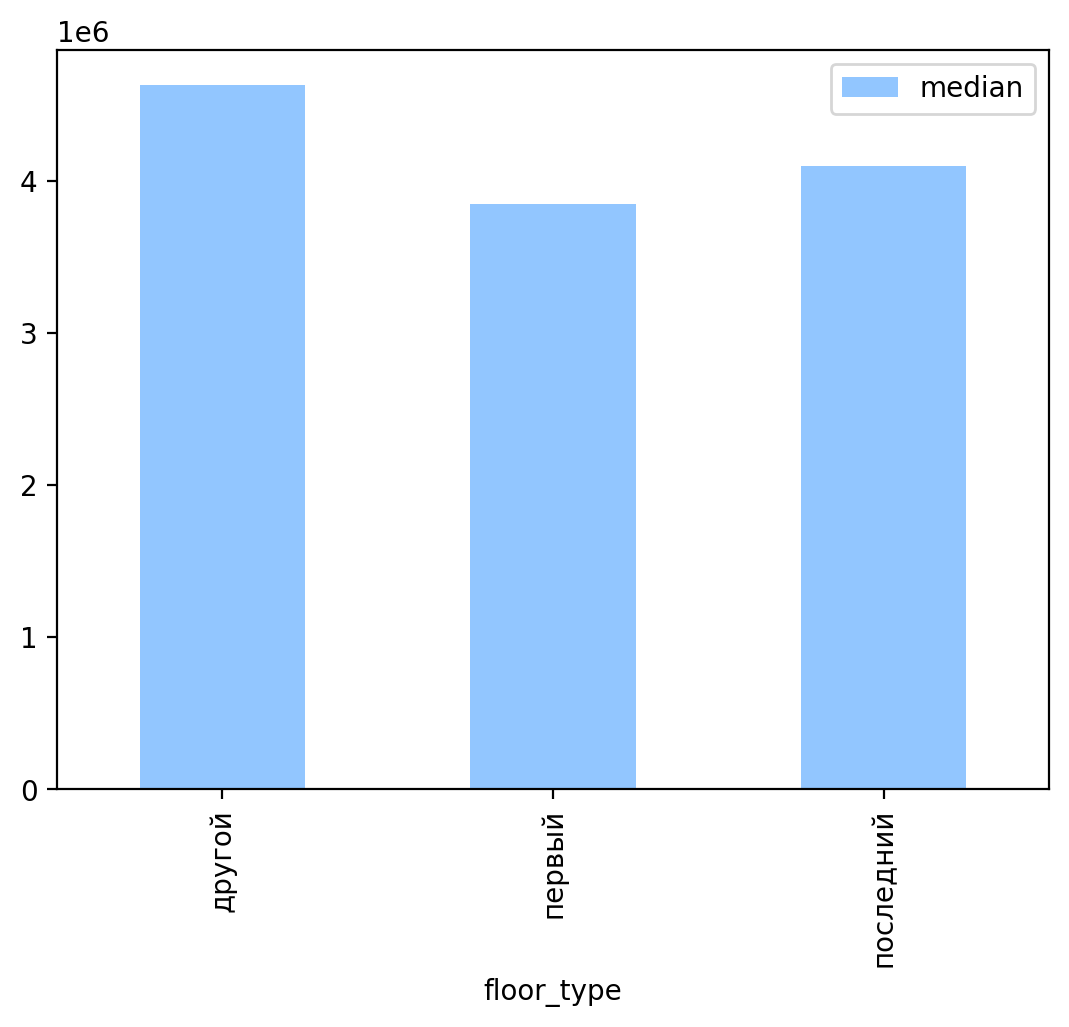

In [73]:
data_pivot_ft = data.pivot_table(index='floor_type', values='last_price', aggfunc=['median'])
data_pivot_ft.columns = ['median']

data_pivot_ft.plot(kind='bar')
plt.show() 

Дороже всего квартиры с типом этажа другой, дешевле всего варианты на первом этаже и чуть уступают в цене другим этажам квартиры с типом этажа последний.

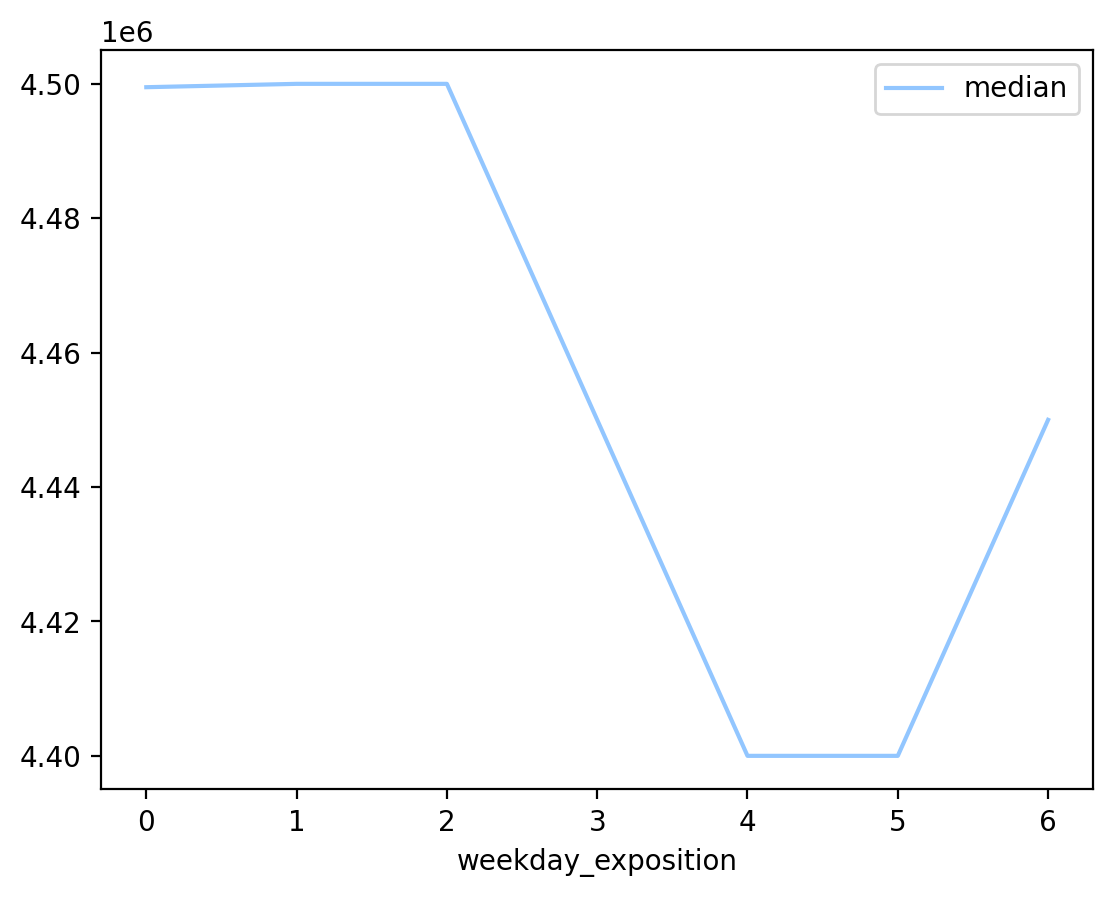

In [74]:
data_pivot_week = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['median'])
data_pivot_week.columns = ['median']

data_pivot_week.plot()
plt.show() 

Дороже всего квартиры публикуемые с понедельника по среду. В целом есть тенденция к уменьшению стоимоти квартир от начала к концу недели, а в воскресенье снова рост.

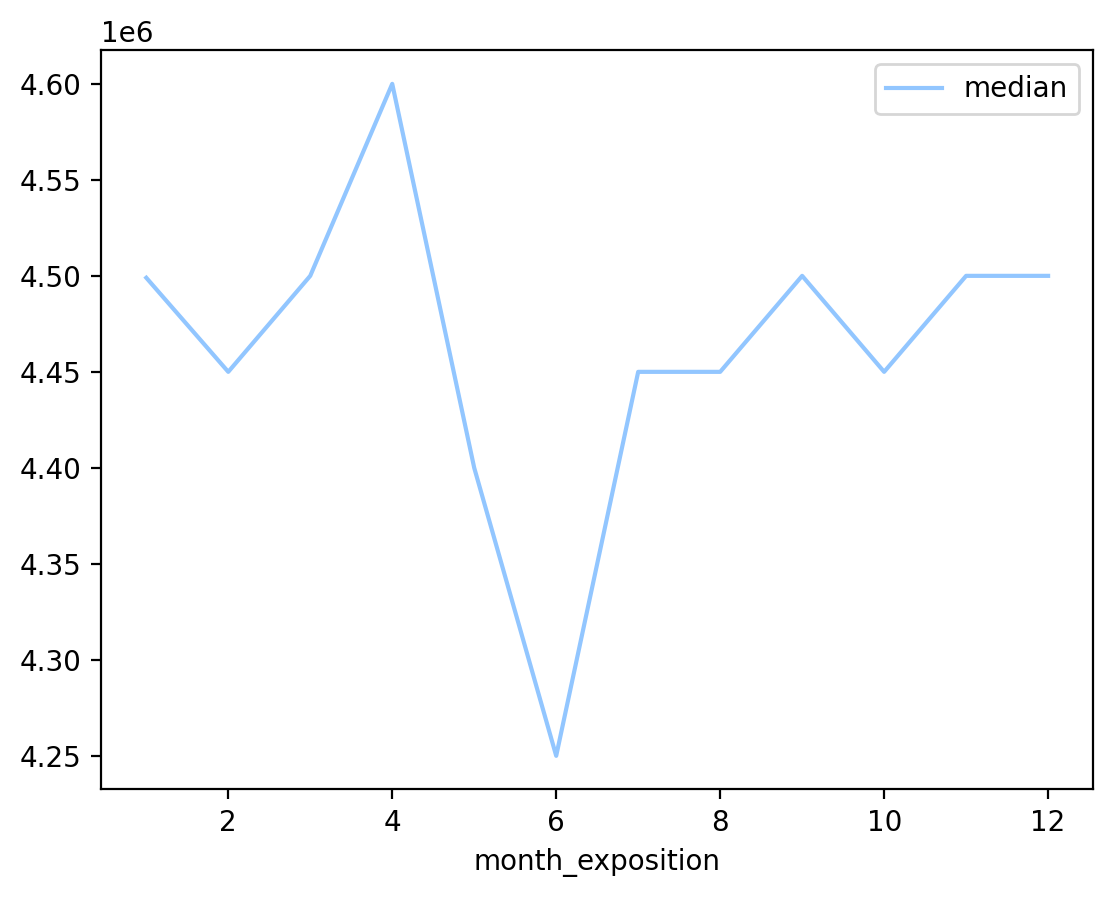

In [75]:
data_pivot_month = data.pivot_table(index='month_exposition', values='last_price', aggfunc=['median'])
data_pivot_month.columns = ['median']

data_pivot_month.plot()
plt.show() 

В течение года пик по стоимости приходится на апрель, а минимум на июнь месяц. 

Возможно это связано с тем, что в начале года наибольшее количество публикаций приходится на февраль, растет спрос, и соответственно предложение. 

В среднем продажи совершаются за 3 месяца, то есть к апрелю спрос велик и цена растет.

Затем к лету спрос снижается, количество публикаций тоже и соответвенно цены становятся чуть ниже.

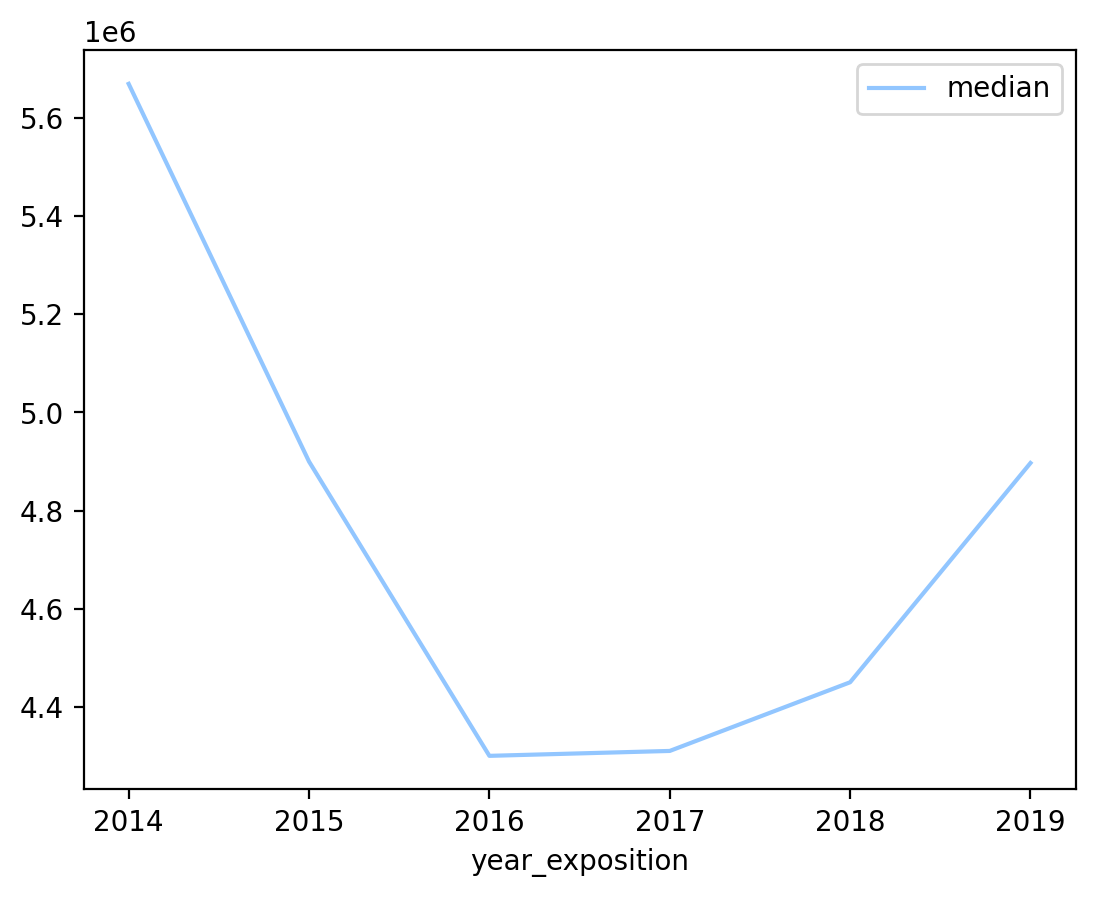

In [76]:
data_pivot_year = data.pivot_table(index='year_exposition', values='last_price', aggfunc=['median'])
data_pivot_year.columns = ['median']

data_pivot_year.plot()
plt.show() 

По графику видна тенденция снижения стоимости квартир начиная с 2014г. по 2017г. Что скорей всего связано с экономическим кризисом в этот период, сокращением спроса, снижением темпов строительства.

С 2017г. начинается  медленный рост.

In [77]:
data_ten = data['locality_name'].value_counts().head(10).index
data_ten #выбираем 10 населённых пунктов с наибольшим числом объявлений

Index(['Санкт-Петербург', 'Мурино', 'Шушары', 'Всеволожск', 'Пушкин',
       'Колпино', 'Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг'],
      dtype='object')

In [78]:
data_price_ten = data.query('locality_name in @data_ten')
data_price_ten = data_price_ten.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['mean'])
data_price_ten.columns = ['mean']
data_price_ten.sort_values(by='mean', ascending=False)

,mean
locality_name,
Санкт-Петербург,106105.661519
Пушкин,100803.208824
деревня Кудрово,92164.259928
Парголово,90340.793750
Мурино,85216.952641
Шушары,78326.601852
Колпино,75425.734328
Гатчина,68539.862876
Всеволожск,67090.461538


**Вывод:**
Самая высокая средняя стоимость квадратного метра жилья из 10 населённых пунктов с наибольшим числом объявлений в Санкт-Петербурге, что не увидительно и она составляет 106 105,66 руб. за кв.м, а самая низкая в Выборге - 58 555,52 руб. за кв. м.

In [79]:
data_spb = data.query("locality_name == 'Санкт-Петербург' and city_сenters_nearest_km > 0")
data_spb = data_spb.pivot_table(index='city_сenters_nearest_km', values='last_price', aggfunc=['mean'])
data_spb.columns = ['mean']
data_spb.sort_values(by='mean')

,mean
city_сenters_nearest_km,
27.0,2.250000e+06
24.0,3.890687e+06
26.0,3.973013e+06
25.0,3.974954e+06
29.0,4.236667e+06
23.0,4.741444e+06
18.0,4.755022e+06
19.0,4.901424e+06
17.0,4.947676e+06


Вывод: чем ближе квартира находится к центру города, тем ее стоимость дороже. Цетром города можем определить диапазон до 8 км, после идет значительное снижение стоимости квартир.

### Общий вывод

Изучив архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, можно сделать следующие выводы:
- обычно продажа квартиры занимает около 3х месяцев, продажи менее 45 дней можно считать быстрыми, а продажи более 500 дней — необычно долгими;
- стоимость квартиры зависит от общей площади, но на цену влияют и другие факторы;
- цена квартиры увеличивается при увеличении жилой площади или площади кухни;
- с увеличением количества комнат увеличивается и стоимость квартиры;
- дешевле всего варианты на первом этаже и чуть уступают в цене другим этажам квартиры с типом этажа последний;
- самая высокая средняя стоимость квадратного метра жилья из 10 населённых пунктов с наибольшим числом объявлений в Санкт-Петербурге, а самая низкая в Выборге;
- чем ближе квартира находится к центру города, тем ее стоимость дороже.